# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from scipy.stats import chi2_contingency
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

%matplotlib inline

In [2]:
# Set the seed
np.random.seed(42)

# Domain Project
***
Stroke adalah salah satu penyebab utama kematian dan kecacatan di seluruh dunia. Menurut World Health Organization (WHO), stroke menyumbang lebih dari 11% dari semua kematian secara global dan menjadi **penyebab kematian nomor 2 secara global**. Penyebab stroke umumnya terkait dengan faktor risiko seperti tekanan darah tinggi, diabetes, riwayat penyakit kardiovaskular, kebiasaan merokok, dan obesitas. Mengembangkan model prediksi yang akurat dapat memberikan dampak signifikan dalam pencegahan stroke, memungkinkan intervensi lebih dini, dan meningkatkan manajemen pasien berisiko tinggi.

Urgensi Penelitian: Dengan meningkatnya prevalensi stroke dan dampaknya terhadap beban kesehatan global, penting untuk mengembangkan alat yang dapat memprediksi risiko stroke berdasarkan atribut pasien. Penelitian ini relevan dalam membantu profesional medis melakukan deteksi awal. Beberapa penelitian sebelumnya telah membahas model prediksi stroke dengan menggunakan metode machine learning. Misalnya, sebuah studi yang dipublikasikan oleh IEEE menggunakan model seperti Random Forest dan Gradient Boosting untuk prediksi stroke, menunjukkan hasil yang menjanjikan.

Referensi:

- Sudharsan, B. et al., “Stroke Prediction Models Using Machine Learning Techniques: A Comprehensive Review,” IEEE Access, vol. 9, 2021. [DOI: 10.1109/ACCESS.2021.3059301]
- WHO (2020) Stroke Factsheet. Available: [www.who.int].

# Business Understanding

## Problem Statement
***
1. Bagaimana mengembangkan model prediksi yang dapat mendeteksi risiko stroke berdasarkan atribut pasien seperti usia, jenis kelamin, riwayat hipertensi, dan kondisi medis lainnya?
2. Apakah penggunaan model machine learning yang kompleks, seperti ensemble learning, dapat meningkatkan akurasi prediksi dibandingkan dengan model benchmark seperti KNN atau Naive Bayes?
3. Bagaimana seleksi fitur seperti ANOVA, Chi-Square, dan Mutual Information dapat mempengaruhi performa model prediksi stroke?
4. Bagaimana pengaruh metode SMOTE untuk menangani data imbalanced terhadap performa model machine learning yang digunakan?

## Goals
***
1. Membangun model prediksi yang mampu mengidentifikasi pasien dengan risiko stroke tinggi untuk meningkatkan intervensi pencegahan dini.
2. Menguji berbagai model machine learning, termasuk ensemble learning dan SVM, serta membandingkan performa mereka terhadap model benchmark.
3. Mengaplikasikan seleksi fitur untuk meningkatkan efisiensi dan akurasi prediksi model.
4. Mengukur pengaruh SMOTE sebagai metode sampling data dalam menangani imbalanced dataset

## [Optional] Solution Statements
***
Untuk mencapai tujuan yang telah dijabarkan, beberapa solusi yang diusulkan meliputi:

**1. Menggunakan Berbagai Algoritma Machine Learning**

Beberapa algoritma machine learning akan diuji untuk melihat mana yang memberikan performa terbaik dalam prediksi risiko stroke. Algoritma yang akan diterapkan termasuk:

- Ensemble Learning: Model seperti Random Forest, AdaBoost, XGBoost, dan Gradient Boosting akan diuji karena kemampuannya dalam menangani data yang kompleks dan mencegah overfitting.
- Support Vector Machine (SVM): SVM dikenal baik dalam memisahkan data non-linear dengan margin maksimum dan dapat digunakan dalam prediksi berbasis kesehatan.
- Baseline Models: Model benchmark seperti K-Nearest Neighbors (KNN) dan Naive Bayes akan diuji sebagai baseline untuk membandingkan performa model yang lebih kompleks.

Metrik Evaluasi: Setiap model akan dievaluasi menggunakan beberapa metrik seperti akurasi, precision, recall, F1-score, dan area under the ROC curve (AUC) untuk mengukur kemampuan prediksi dan penanganan class imbalance.

**2. Improvement melalui Hyperparameter Tuning**

- Hyperparameter tuning akan dilakukan untuk meningkatkan performa model yang diusulkan. Teknik tuning seperti Grid Search atau Randomized Search akan diterapkan pada model-model yang telah dibangun. 

Metrik Evaluasi: Setelah tuning, model akan dievaluasi kembali untuk memastikan peningkatan performa dibandingkan baseline model menggunakan metrik yang sama (akurasi, precision, recall, F1-score, dan AUC).

**3. Seleksi Fitur**

- Untuk mengurangi noise dan meningkatkan interpretabilitas model, seleksi fitur akan dilakukan menggunakan ANOVA atau Chi-Square pada fitur kategorikal. 

Metrik Evaluasi: Pengaruh seleksi fitur akan dievaluasi dengan membandingkan performa model sebelum dan sesudah pengaplikasian teknik ini menggunakan metrik yang sama.

**4. Sampling Data dengan SMOTE***

- Data imbalanced mungkin memiliki pengaruh terhadap performa model klasifikasi. Oleh karena itu, pada eksperimen ini juga diterapkan teknik SMOTE sebagai sampling method 

Metriks Evaluasi yang digunakan sama seperti sebelumnya yaitu performa model sebelum dan sesudah menggunakan data hasil sampling dengan SMOTE yang diukur dengan F1-score, Precision, Recall, dan AUC

# Data Understanding

## Tautan Sumber Dataset
***
- From published paper IEEE: https://ieee-dataport.org/documents/stroke-prediction-dataset
- Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Deskripsi variabel-variabel pada dataset
***
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.
***
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
***
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

### Data Loading

In [3]:
# load dataset
brain_df = pd.read_csv('./dataset/BrainStroke.csv')
brain_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [4]:
# menampilkan daftar atribut/kolom pada dataset
brain_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Terdapat **4.981** baris data dengan 11 atribut termasuk kelas target (**stroke**)

## [Optional] Data Visualization and Exploratory Data Analysis
***
Beberapa pertanyaan yang akan dijawab pada tahap ini yaitu: <br>
1. Bagaimana tipe data dari setiap atribut (independen) termasuk kelas target (dependen)?
2. Bagaimana persebaran data dan distribusi dari atribut bertipe numerik?
3. Bagaimana persebaran data dari setiap atribut non numerik?
3. Apa saja kelas targetnya (label) dan bagaimana proporsi jumlah data per kelasnya, apakah imbalanced?
4. Apakah ada missing values?
5. Apakah ada data redundan?
6. Bagaimana korelasi antar fitur dan target?
7. Bagaimana korelasi antar fitur dan fitur, apakah ada fitur yang tidak berguna?

### Tipe data dari setiap atribut

In [5]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


***
- Ada 5 kolom bertipe kategorikal: gender, ever_married, work_type, Residence_type, smoking_status
- Ada 3 kolom bertipe integer (termasuk target), hypertension, heart_disease, stroke
- Ada 3 kolom bertipe float: age, avg_glocuse_level, bmi

***
Jika dilihat dari deskripsi dataset, tiga kolom bertipe numerik sebenarnya adalah bertipe katgeorikal juga, karena menunjukkan opsi **Yes/No** saja

In [6]:
brain_df['stroke'].value_counts()

0    4733
1     248
Name: stroke, dtype: int64

In [7]:
# mengubah nilai dari atribut bertipe numerik ke kategorikal
# Mengubah tipe kolom stroke dari int64 ke object dengan map
brain_df['stroke'] = brain_df['stroke'].map({0: 'Not Stroke', 1: 'Stroke'})
brain_df['hypertension'] = brain_df['hypertension'].map({0: 'Not Hypertension', 1: 'Hypertension'})
brain_df['heart_disease'] = brain_df['heart_disease'].map({0: 'Not Heart Disease', 1: 'Heart Disease'})

In [8]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   object 
 3   heart_disease      4981 non-null   object 
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   object 
dtypes: float64(3), object(8)
memory usage: 428.2+ KB


### Persebaran dan distribusi data bertipe Numerikal

In [9]:
brain_df.describe()

,age,avg_glucose_level,bmi
count,4981.000000,4981.000000,4981.000000
mean,43.419859,105.943562,28.498173
std,22.662755,45.075373,6.790464
min,0.080000,55.120000,14.000000
25%,25.000000,77.230000,23.700000
50%,45.000000,91.850000,28.100000
75%,61.000000,113.860000,32.600000
max,82.000000,271.740000,48.900000


**Analisis** <br>
1. Rata-rata umur pasien pada dataset ini yaitu 43 - 44 tahun dengan rata-rata level glukosa sebesar 105,94 dan rata-rata BMI sebesar 28,498
2. Ada hal yang menarik pada kolom **Age** dimana tidak bernilai integer, melainkan float, semisal (0.08, 0.16, 0.24, 0.32, 0.40, dst)-->kelipatan 0.08. Setelah ditelusuri pada sumber link dataset, tidak ada deskripsi lebih detail yang menjelaskan atribut tersebut. Oleh karena itu, pada tugas ini nilai tersebut digunakan sebagai mana adanya

#### Analisis kolom "age"

In [10]:
# menunjukkan nilai Age yang bernilai float
brain_df['age'].value_counts().sort_index().head(20).to_dict()

{0.08: 2,
 0.16: 1,
 0.24: 5,
 0.32: 5,
 0.4: 2,
 0.48: 3,
 0.56: 5,
 0.64: 4,
 0.72: 5,
 0.8: 4,
 0.88: 5,
 1.0: 5,
 1.08: 7,
 1.16: 3,
 1.24: 7,
 1.32: 8,
 1.4: 3,
 1.48: 6,
 1.56: 4,
 1.64: 8}

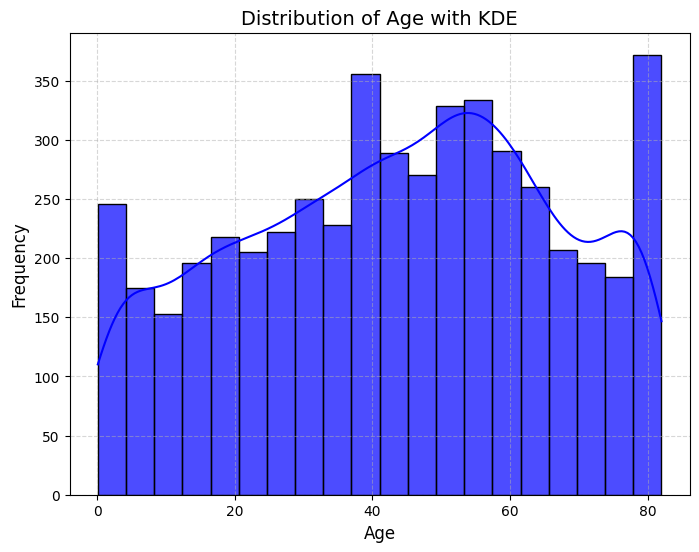

In [11]:
# melihat distribusi untuk atribut Age
# Create a histogram of the 'age' column
plt.figure(figsize=(8, 6))
sns.histplot(brain_df['age'], bins=20, kde=True, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Age with KDE', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

In [12]:
# melihat jumlah baris data dengan age <1
brain_df[
    brain_df['age']<1
].sort_values(by='age')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3057,Male,0.08,Not Hypertension,Not Heart Disease,No,children,Rural,70.33,16.9,Unknown,Not Stroke
1487,Female,0.08,Not Hypertension,Not Heart Disease,No,children,Urban,139.67,14.1,Unknown,Not Stroke
3363,Male,0.16,Not Hypertension,Not Heart Disease,No,children,Urban,114.71,17.4,Unknown,Not Stroke
2686,Male,0.24,Not Hypertension,Not Heart Disease,No,children,Urban,58.35,18.6,Unknown,Not Stroke
909,Male,0.24,Not Hypertension,Not Heart Disease,No,children,Rural,118.87,16.3,Unknown,Not Stroke
3996,Male,0.24,Not Hypertension,Not Heart Disease,No,children,Urban,57.09,19.4,Unknown,Not Stroke
3148,Male,0.24,Not Hypertension,Not Heart Disease,No,children,Urban,89.28,14.2,Unknown,Not Stroke
1843,Male,0.24,Not Hypertension,Not Heart Disease,No,children,Rural,146.97,18.5,Unknown,Not Stroke
4592,Female,0.32,Not Hypertension,Not Heart Disease,No,children,Urban,108.63,19.6,Unknown,Not Stroke
504,Female,0.32,Not Hypertension,Not Heart Disease,No,children,Rural,73.71,16.2,Unknown,Not Stroke


In [13]:
# melihat jumlah baris data dengan age >60 yang targetnya stroke
brain_df[
    (brain_df['age']>60) &
    (brain_df['stroke']=='Stroke')
].sort_values(by='age')

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4814,Male,61.0,Not Hypertension,Heart Disease,Yes,Private,Urban,209.86,32.9,Unknown,Stroke
69,Male,61.0,Not Hypertension,Heart Disease,Yes,Private,Rural,111.81,27.3,smokes,Stroke
149,Male,61.0,Hypertension,Heart Disease,Yes,Private,Urban,112.24,37.4,smokes,Stroke
4780,Female,61.0,Not Hypertension,Not Heart Disease,Yes,Self-employed,Rural,202.21,31.6,never smoked,Stroke
9,Female,61.0,Not Hypertension,Heart Disease,Yes,Govt_job,Rural,120.46,36.8,smokes,Stroke
...,...,...,...,...,...,...,...,...,...,...,...
19,Male,82.0,Not Hypertension,Heart Disease,Yes,Private,Rural,208.30,32.5,Unknown,Stroke
26,Female,82.0,Hypertension,Not Heart Disease,Yes,Self-employed,Urban,196.92,22.2,never smoked,Stroke
116,Male,82.0,Not Hypertension,Heart Disease,Yes,Govt_job,Rural,103.68,25.0,never smoked,Stroke
29,Female,82.0,Hypertension,Heart Disease,No,Private,Rural,84.03,26.5,formerly smoked,Stroke


**Analisis** <br>

1. Jika dilihat dari data-data dari range 'age' dibawah 1, maka dapat dikatakan sebagai anak-anak (bayi) yang semua kelasnya bernilai 'Not Stroke'. Ini masuk akal karena anak-anak (bayi) belum terpengaruh gaya hidup dan sebagainya yang berakibat pada stroke

#### Analisis kolom 'bmi'

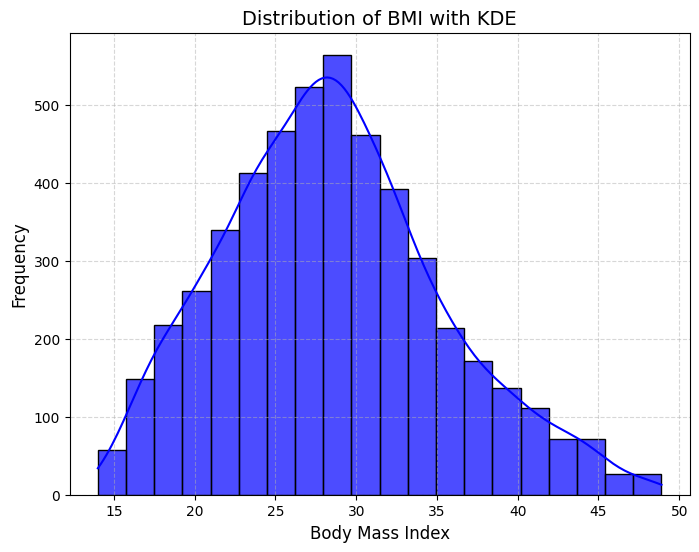

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(brain_df['bmi'], bins=20, kde=True, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of BMI with KDE', fontsize=14)
plt.xlabel('Body Mass Index', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

Persebaran data pada kolom 'BMI' sedikit right-skewed namun cenderung berdistribusi normal. <br>
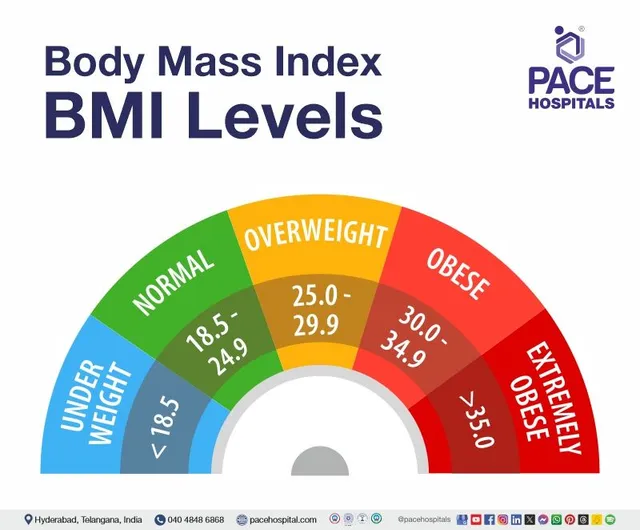

- Sumber gambar: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.pacehospital.com%2Fbmi-calculator-ranges-importance&psig=AOvVaw0o62ptQTDPg7YXN7hULcsO&ust=1728622103941000&source=images&cd=vfe&opi=89978449&ved=0CBEQjRxqFwoTCMj286mBg4kDFQAAAAAdAAAAABAE

#### Analisis kolom 'avg_glucose_level'

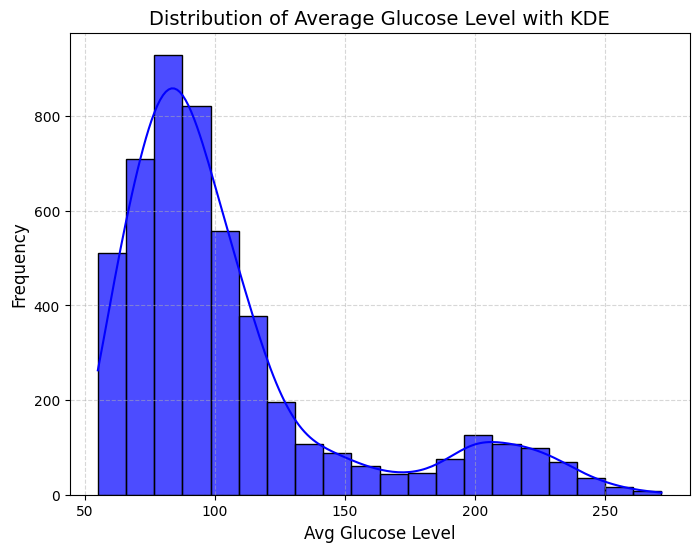

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(brain_df['avg_glucose_level'], bins=20, kde=True, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Average Glucose Level with KDE', fontsize=14)
plt.xlabel('Avg Glucose Level', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

Distribusi *avg_glucose_level* adalah right-skewed, ini mungkin berimplikasi pada performa model

### Persebaran dan distrbusi data bertipe kategorikal

In [16]:
brain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   object 
 3   heart_disease      4981 non-null   object 
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   object 
dtypes: float64(3), object(8)
memory usage: 428.2+ KB


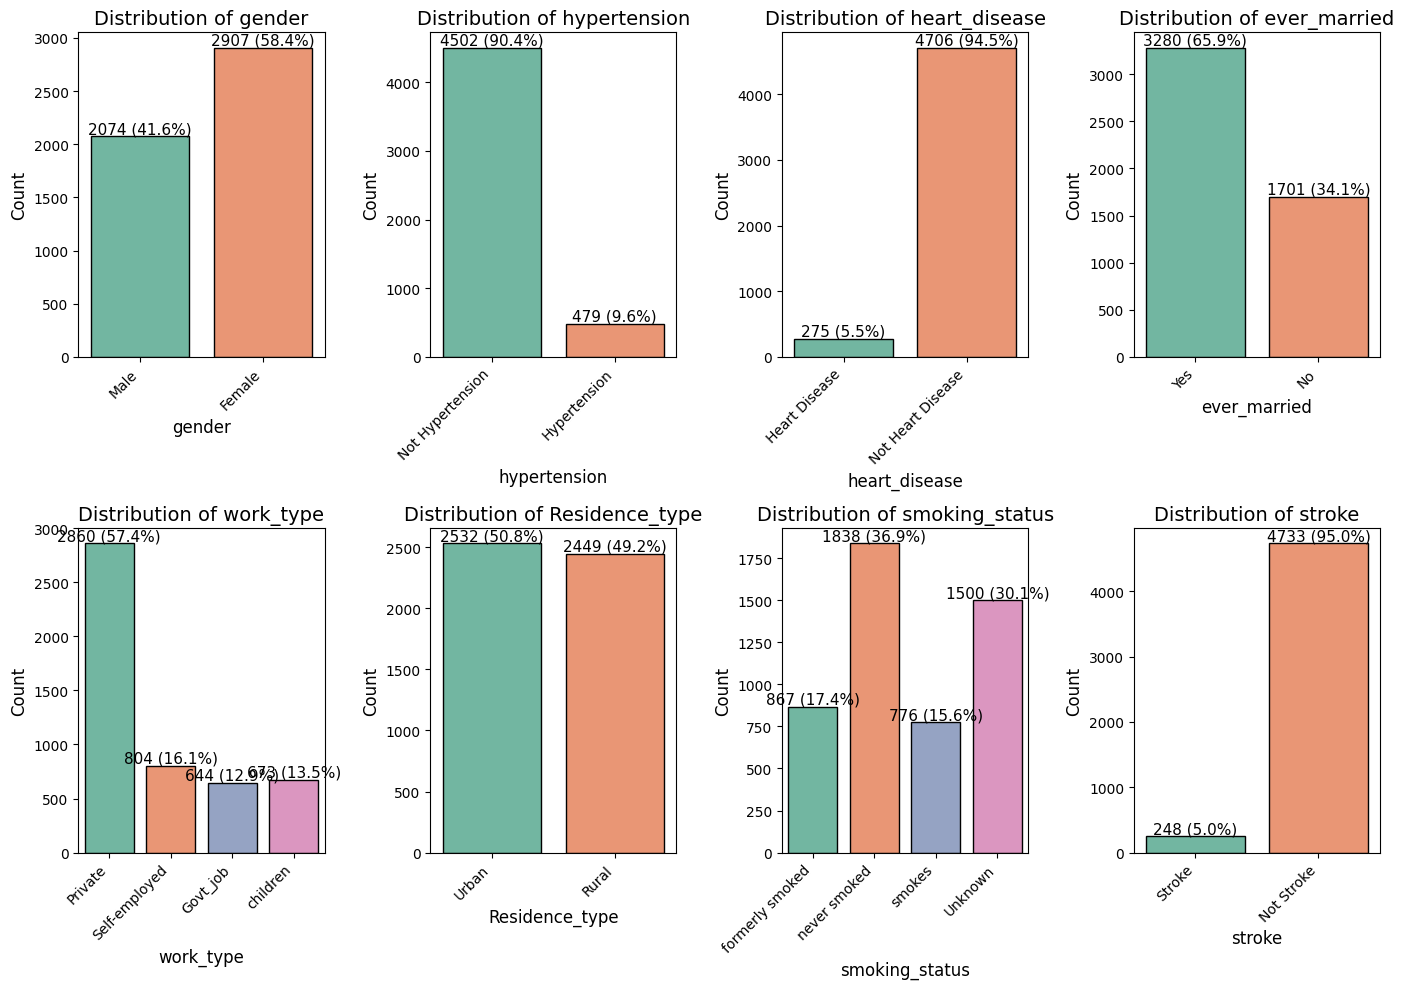

In [17]:
# List of categorical columns to plot
categorical_cols = ['gender', 'hypertension', 'heart_disease', 
                    'ever_married', 'work_type', 'Residence_type', 'smoking_status',
                    'stroke'
                   ]

# Set up the matplotlib figure for subplots
plt.figure(figsize=(14, 10))

# Loop through each categorical column and create a subplot
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 4, i)  # 2 rows and 4 columns of subplots
    ax = sns.countplot(data=brain_df, x=col, palette='Set2', edgecolor='black')
    
    # Add title and labels for each subplot
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    
    # Calculate total count for percentage calculation
    total_count = len(brain_df)

    # Add frequency and percentage labels on top of each bar
    for p in ax.patches:
        count = p.get_height()
        percentage = (count / total_count) * 100
        ax.annotate(f'{count} ({percentage:.1f}%)', 
                    (p.get_x() + p.get_width() / 2, count), 
                    ha='center', va='bottom', fontsize=11)

    # Rotate x-axis labels if necessary
    plt.xticks(rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

### Apakah ada outliers pada atribut bertipe numerikal?

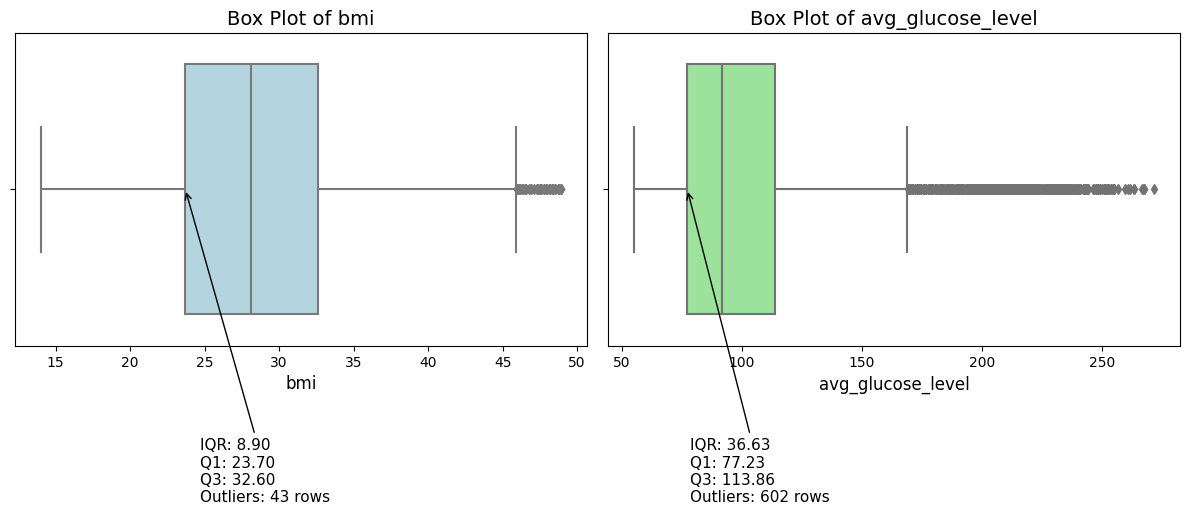

In [18]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# List of numerical columns to plot
numerical_columns = ['bmi', 'avg_glucose_level']

# Loop through each numerical column
for i, col in enumerate(numerical_columns):
    # Calculate IQR
    Q1 = brain_df[col].quantile(0.25)
    Q3 = brain_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = brain_df[(brain_df[col] < lower_bound) | (brain_df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    
    plt.subplot(1, 2, i + 1)  # Create a subplot for each column
    sns.boxplot(x=brain_df[col], color='lightblue' if i == 0 else 'lightgreen')
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

    # Annotate the IQR and outlier count for the current column
    plt.annotate(f'IQR: {IQR:.2f}\nQ1: {Q1:.2f}\nQ3: {Q3:.2f}\nOutliers: {outlier_count} rows', 
                 xy=(Q1, 0), 
                 xytext=(Q1 + 1, 1), 
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=11)

# Adjust layout
plt.tight_layout()
plt.show()

**Analisis** <br>
- Terlihat cukup banyak terdapat outliers pada kedua atribut tersebut (**bmi** dan **avg_glucose_level**), outliers tersebut akan ditangani pada tahap **Data Preparation**

### Apa saja kelas targetnya dan bagaimana persebarannya, apakah ada imbalanced?

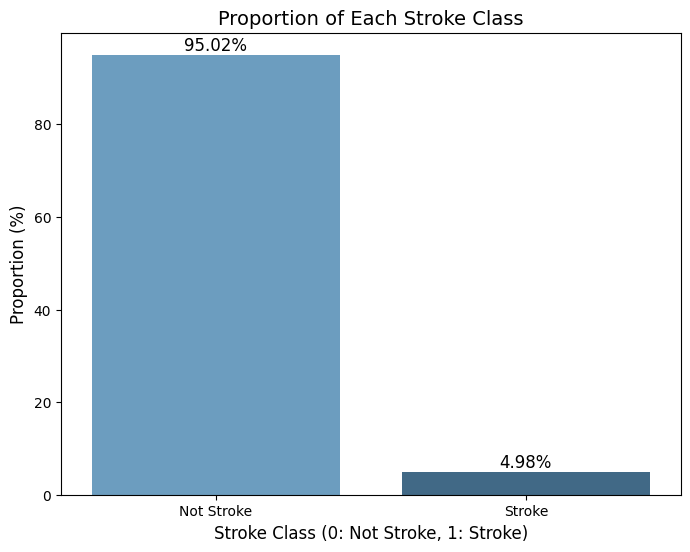

In [19]:
# Calculate the proportion of each class label
proportions = brain_df['stroke'].value_counts(normalize=True) * 100

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=proportions.index, y=proportions.values, palette='Blues_d')

# Add text annotations to each bar
for i, val in enumerate(proportions.values):
    plt.text(i, val + 1, f'{val:.2f}%', ha='center', fontsize=12)

# Set plot labels and title
plt.title('Proportion of Each Stroke Class', fontsize=14)
plt.xlabel('Stroke Class (0: Not Stroke, 1: Stroke)', fontsize=12)
plt.ylabel('Proportion (%)', fontsize=12)

# Show the plot
plt.show()

Distribusi jumlah baris data pada setiap kelasnya menunjukkan kelas yang tidak seimbang (imbalanced class). Hal ini wajar pada dataset medis dimana kelas yang penting (penyakit) memiliki record data yang lebih sedikit dibanding record data untuk orang normal (non-penyakit).
***
- Model benchmark/baseline akan melihat performa model dalam mengenali dataset imbalanced, baru setelahnya proposed model akan melihat performa model dengan dataset yang telah ditangani menjadi balanced dengan SMOTE

### Apakah ada missing values?

In [20]:
brain_df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Dari kode di atas menunjukkan tidak ada dataset, **Namun**, dari deskripsi dataset pada link, dikatakan pada nilai "Unknown" pada atribut **smoking_status** menunjukkan tidak adanya informasi yang tersedia bagi baris data tersebut. Dengan kata lain, itu adalah missing values

In [21]:
# filter baris data yang smoking_status==Unknown
brain_df[
    brain_df['smoking_status']=='Unknown'
]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
7,Female,78.00,Not Hypertension,Not Heart Disease,Yes,Private,Urban,58.57,24.2,Unknown,Stroke
19,Male,82.00,Not Hypertension,Heart Disease,Yes,Private,Rural,208.30,32.5,Unknown,Stroke
25,Male,42.00,Not Hypertension,Not Heart Disease,Yes,Private,Rural,83.41,25.4,Unknown,Stroke
32,Male,58.00,Not Hypertension,Not Heart Disease,No,Private,Rural,92.62,32.0,Unknown,Stroke
54,Male,76.00,Not Hypertension,Not Heart Disease,Yes,Private,Urban,104.47,20.3,Unknown,Stroke
...,...,...,...,...,...,...,...,...,...,...,...
4958,Male,32.00,Hypertension,Not Heart Disease,No,Private,Rural,74.43,31.5,Unknown,Not Stroke
4962,Male,3.00,Not Hypertension,Not Heart Disease,No,children,Rural,194.75,20.1,Unknown,Not Stroke
4967,Male,59.00,Not Hypertension,Not Heart Disease,Yes,Private,Urban,223.16,33.2,Unknown,Not Stroke
4969,Female,70.00,Not Hypertension,Heart Disease,Yes,Self-employed,Rural,65.68,28.6,Unknown,Not Stroke


Oleh karena jumlah baris datanya cukup besar 1.500, maka pada percobaan ini, nilai **Unknown** akan dianggap sebagai nilai tersendiri dan bukan dianggap missing values. Harapannya ini juga bisa menjadi pengetahuan untuk model Machine Learning dalam mengenali pola pada dataset

In [22]:
# check missing values pada bmi dan avg_glucose_level ( is contain 0)
brain_df[
    (brain_df['avg_glucose_level']<1) | 
    (brain_df['bmi']<1)
]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Kedua atribut tersebut juga tidak menunjukkan adanya missing values

### Apakah ada data redundan?

In [23]:
brain_df[
    brain_df.duplicated()
]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Tidak ada baris data yang redundan

### Bagaimana korelasi antara tiap fitur dan target?

#### Categorical Features

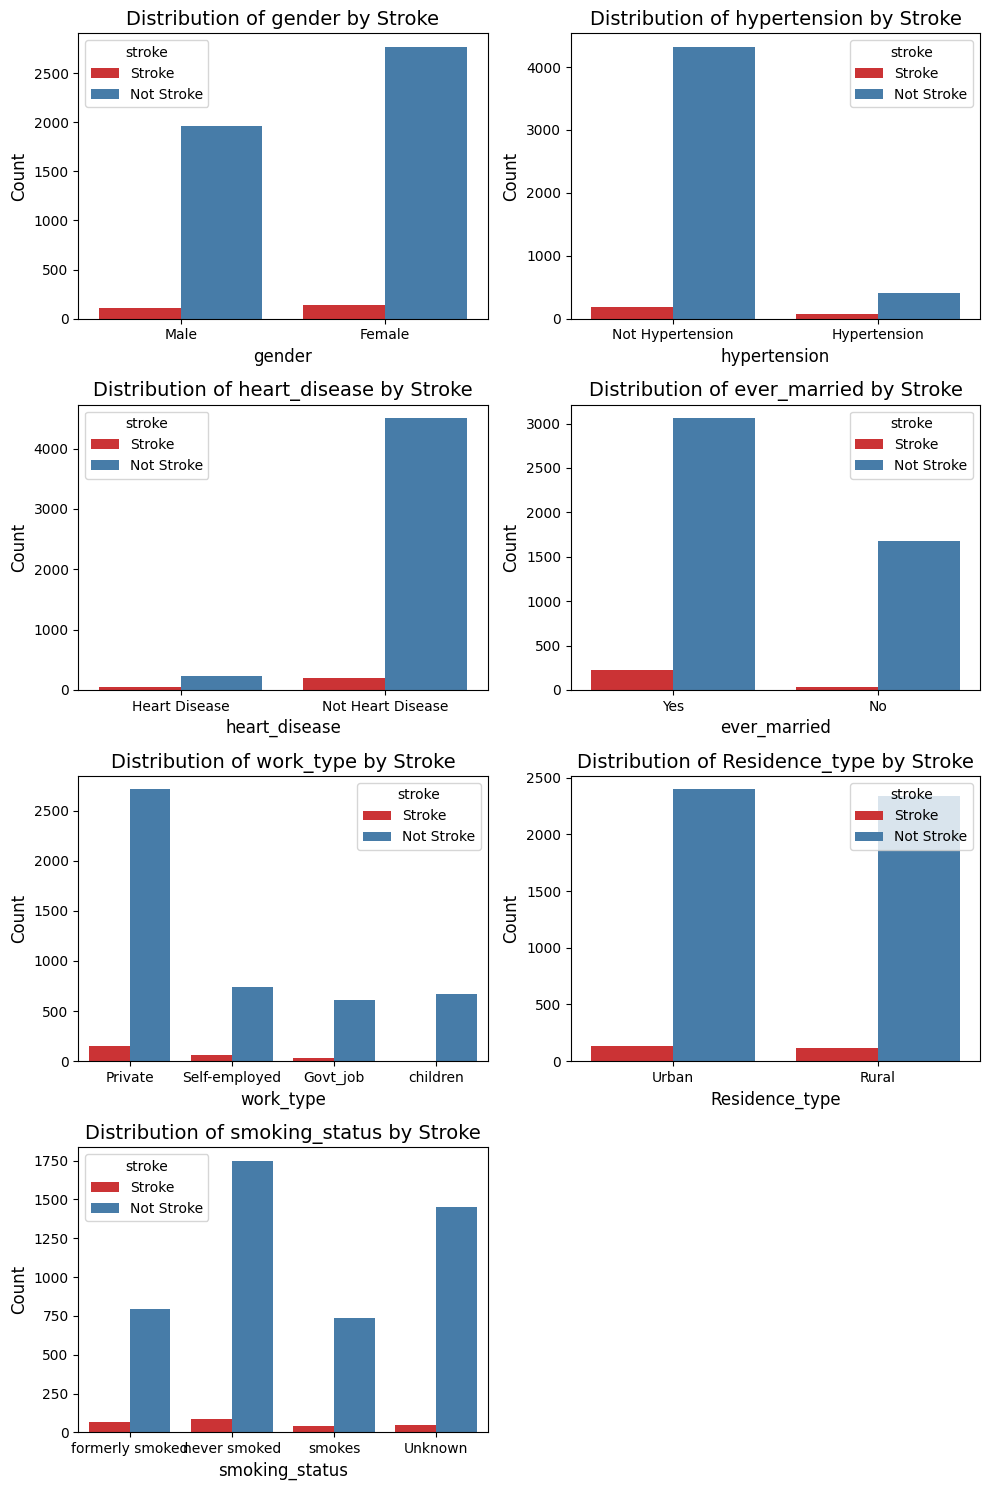

In [24]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 15))

# List of categorical columns to plot against stroke
categorical_columns = [x for x in brain_df.select_dtypes(include='object').columns.to_list() if x != 'stroke']

# Loop through each categorical column
for i, col in enumerate(categorical_columns):
    plt.subplot(4, 2, i+1)  # Create a subplot for each column
    sns.countplot(data=brain_df, x=col, hue='stroke', palette='Set1')
    
    # Set titles and labels
    plt.title(f'Distribution of {col} by Stroke', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

#### Numerical Features

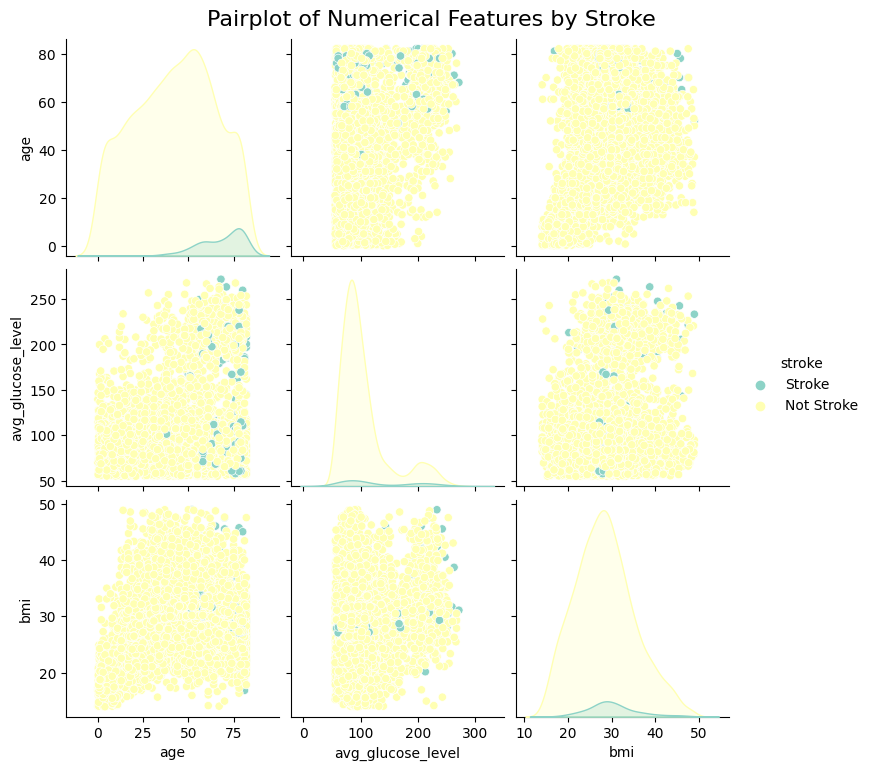

In [25]:
# mengamati hubungan antara numerical features dan target class
# Create a pairplot
sns.pairplot(brain_df, hue='stroke', palette='Set3', diag_kind='kde')

# Set titles
plt.suptitle('Pairplot of Numerical Features by Stroke', y=1.02, fontsize=16)

# Show the plot
plt.show()

**Analisis** <br>
Dari hasil pairplot di atas dapat ditarik beberapa informasi: <br>
1. Semakin tinggi *avg_glucose_level* dan *age* cenderung terkena stroke dan sebaliknya
2. Semakin tinggi *bmi* dan *age* cenderung terkena stroke dan sebaliknya, meskipun ada beberapa data yang overlap. Fitur ini mungkin memiliki informasi yang tetap berguna untuk mengenali pola
3. Kecenderungan stroke juga terjadi ketika *bmi* dan *avg_glucose_level* nya tinggi, namun pada beberapa kasus nilai *avg_glucose_level* menengah kebawah juga ada yang mengidap stroke dengan *bmi* menengah

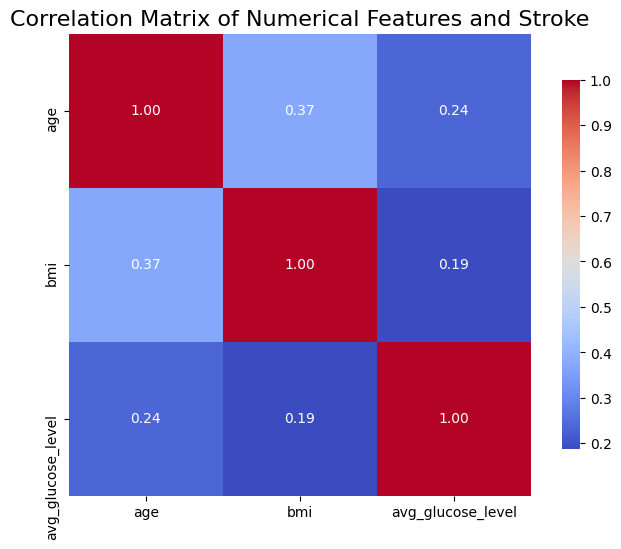

In [26]:
# bagaimana korelasi antar fitur? Apakah ada fitur yang tidak berguna?

# Calculate the correlation matrix
correlation_matrix = brain_df[['age', 'bmi', 'avg_glucose_level']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Set title
plt.title('Correlation Matrix of Numerical Features and Stroke', fontsize=16)

# Show the plot
plt.show()

**Analisis** <br>
- Dari hasil matriks korelasi tidak ada dua fitur numerik yang memiliki korelasi yang tinggi, sehingga setiap fitur numerik tersebut tidak ada yang redundan

### Bagaimana feature importance terhadap target

#### Categorical features with Target (Chi-squared and Mutual Information)

In [27]:
categorical_columns

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status']

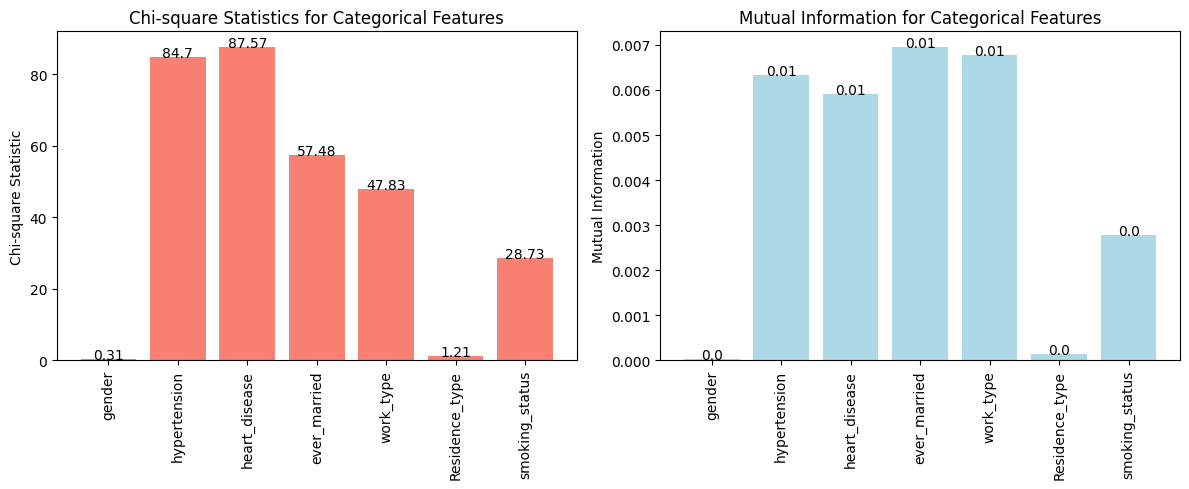

In [28]:
encoded_brain_df = brain_df.copy()

# Encode categorical variables
le = LabelEncoder()
for col in categorical_columns:
    encoded_brain_df[col] = le.fit_transform(brain_df[col])

# Calculate Chi-square statistics
chi2_stats = []
p_values = []
for col in categorical_columns:
    contingency_table = pd.crosstab(brain_df[col], brain_df['stroke'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_stats.append(chi2_stat)
    p_values.append(p_value)

# Calculate Mutual Information
X = encoded_brain_df[categorical_columns]
y = brain_df['stroke']
mutual_info = mutual_info_classif(X, y, discrete_features=True)

# Create DataFrames for visualization
chi2_results = pd.DataFrame({'Feature': categorical_columns, 'Chi2_stat': chi2_stats, 'p-value': p_values})
mi_results = pd.DataFrame({'Feature': categorical_columns, 'Mutual_Info': mutual_info})

# Merge results for plotting
results = pd.merge(chi2_results, mi_results, on='Feature')

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Chi-square bar plot
ax[0].bar(results['Feature'], results['Chi2_stat'], color='salmon')
ax[0].set_title('Chi-square Statistics for Categorical Features')
ax[0].set_ylabel('Chi-square Statistic')
ax[0].set_xticks(np.arange(len(results['Feature'])))  # Set x-ticks
ax[0].set_xticklabels(results['Feature'], rotation=90)  # Rotate x-labels
for i in range(len(results)):
    ax[0].text(i, results['Chi2_stat'][i], round(results['Chi2_stat'][i], 2), ha='center')

# Mutual Information bar plot
ax[1].bar(results['Feature'], results['Mutual_Info'], color='lightblue')
ax[1].set_title('Mutual Information for Categorical Features')
ax[1].set_ylabel('Mutual Information')
ax[1].set_xticks(np.arange(len(results['Feature'])))  # Set x-ticks
ax[1].set_xticklabels(results['Feature'], rotation=90)  # Rotate x-labels
for i in range(len(results)):
    ax[1].text(i, results['Mutual_Info'][i], round(results['Mutual_Info'][i], 2), ha='center')

plt.tight_layout()
plt.show()

In [29]:
results

,Feature,Chi2_stat,p-value,Mutual_Info
0,gender,0.313520,5.755279e-01,0.000039
1,hypertension,84.697532,3.476842e-20,0.006322
2,heart_disease,87.566008,8.151357e-21,0.005921
3,ever_married,57.481294,3.412090e-14,0.006953
4,work_type,47.831772,2.312446e-10,0.006769
5,Residence_type,1.207675,2.717930e-01,0.000136
6,smoking_status,28.733513,2.547568e-06,0.002774


**Analisis** <br>
1. Dari dua analisis dengan **Chi-square** dan **Mutual Information** menunjukkan bahwa *gender* dan *Residence_type* tidak terlalu signifikan mempengaruhi stroke
2. *Hypertension, heart_disease, ever_married* menjadi tiga fitur teratas yang memiliki pengaruh terhadap stroke berdasarkan dua analisis tersebut
***

1. Fitur **gender**, **Residence_type** dapat dihapus karena signifikansinya terhadap label stroke kecil

#### Numerical features with Target (ANOVA F-score)

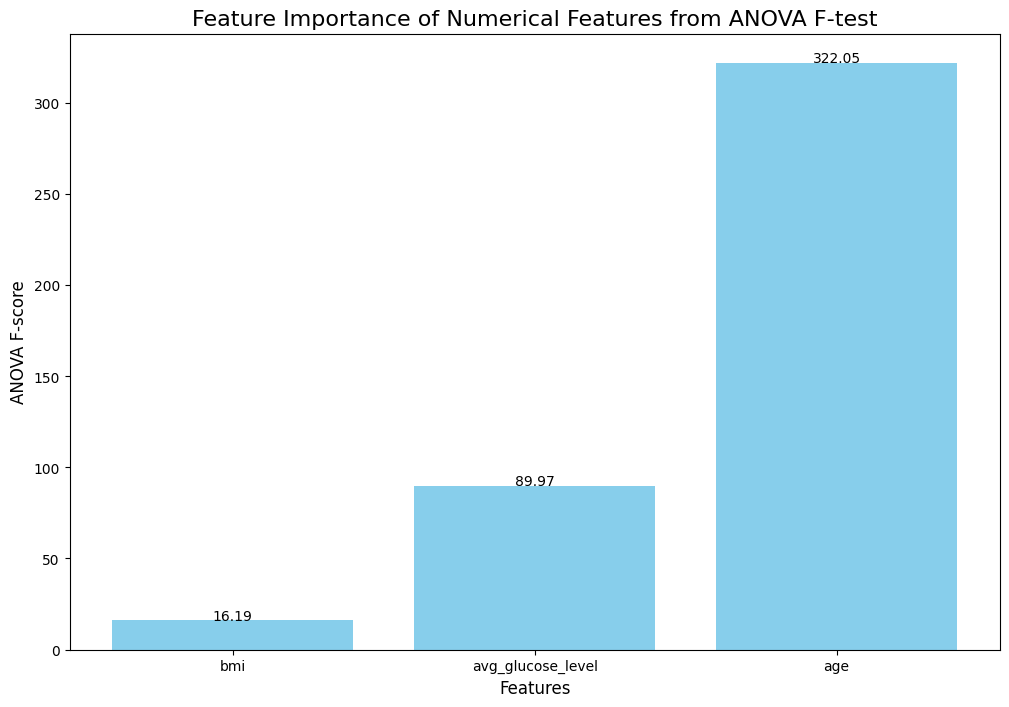

In [30]:
# Separate features and target variable
X = brain_df[['bmi', 'avg_glucose_level', 'age']]
y = brain_df['stroke']

# Perform ANOVA F-test
f_scores, p_values = f_classif(X, y)

# Create a DataFrame to display F-scores and p-values
anova_results = pd.DataFrame({'Feature': X.columns, 'F-score': f_scores, 'p-value': p_values})

# Plotting feature importance
plt.figure(figsize=(12, 8))
plt.bar(anova_results['Feature'], anova_results['F-score'], color='skyblue')
plt.xlabel('Features', fontsize=12)
plt.ylabel('ANOVA F-score', fontsize=12)
plt.title('Feature Importance of Numerical Features from ANOVA F-test', fontsize=16)

# Add F-score values on top of each bar
for i in range(len(anova_results)):
    plt.text(i, anova_results['F-score'][i] + 0.1, round(anova_results['F-score'][i], 2), 
             ha='center', fontsize=10)

plt.show()

In [31]:
anova_results

,Feature,F-score,p-value
0,bmi,16.187059,5.823561e-05
1,avg_glucose_level,89.971820,3.642051e-21
2,age,322.045639,7.897561e-70


**Analisis**<br>
1. Age dan Avg_glucose_level menjadi dua fitur yang paling signifikan mempengaruhi stroke disusul bmi diurutan ketiga

# Data Preparation
***
Berdasarkan hasil **Data Understanding**, maka pada data preparation dilakukan langkah-langkah sebagai berikut sebelum dilakukan pemodelan dengan machine learning: <br>
- Menangani outliers dengan winsorizing method sesuai paper (https://ojs.unud.ac.id/index.php/jlk/article/view/85746/44834)
- Enkoding atribut bertipe kategorikal
- Hapus fitur-fitur yang kurang signifikan terhadap stroke (Gender, Residence_type, bmi)
- Train-test split:
    - Standardization untuk atribut bertipe numerikal

## Menangani outliers pada atribut numerik (bmi and glucose_level) dengan winsorizing
***
How Winsorizing works? <br>
1. Step 1: Identify the percentiles you want to use for winsorizing. Common choices are the 5th and 95th percentiles.
2. Step 2: Calculate these percentiles from the dataset.
3. Step 3: Replace any values below the lower percentile with the value at that percentile and any values above the upper percentile with the value at that percentile.

In [32]:
# aplikasikan teknik winsorizing, k=5 untuk bmi, k=12.5 untuk avg_glucose_level
for num_col in numerical_columns:
    # Winsorizing certain threshold
    k = 5
    if num_col=='avg_glucose_level':
        k=12.5
        
    lower_percentile = brain_df[num_col].quantile(0.01 * k)
    upper_percentile = brain_df[num_col].quantile(1 - (0.01 * k))

    # Apply winsorization
    brain_df[num_col] = brain_df[num_col].clip(lower=lower_percentile, upper=upper_percentile)

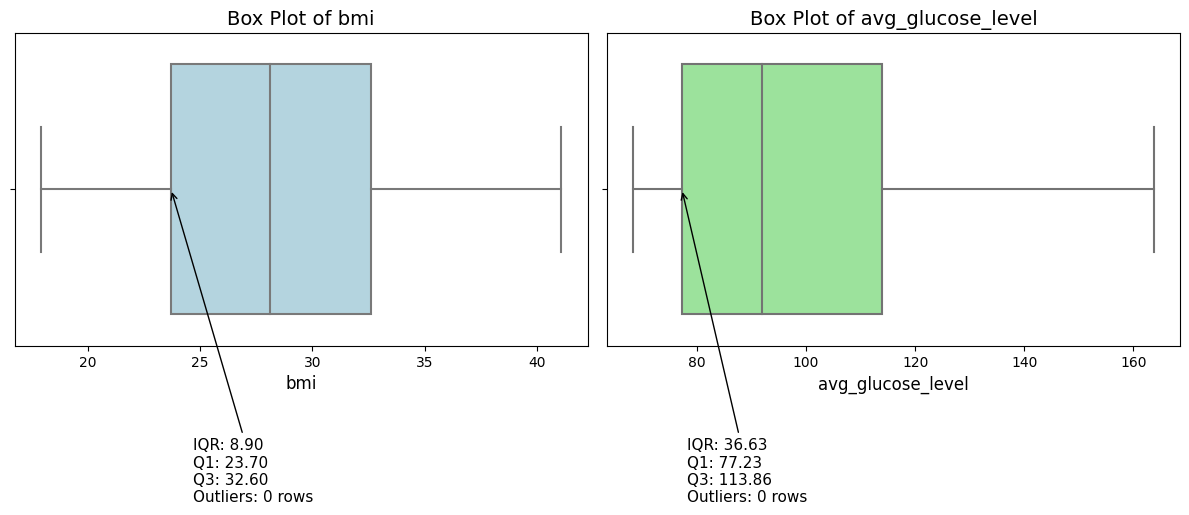

In [33]:
# check outliers kembali apakah masih ada setelah menerapkan teknik winsorizing
# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# List of numerical columns to plot
numerical_columns = ['bmi', 'avg_glucose_level']

# Loop through each numerical column
for i, col in enumerate(numerical_columns):
    # Calculate IQR
    Q1 = brain_df[col].quantile(0.25)
    Q3 = brain_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Determine outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = brain_df[(brain_df[col] < lower_bound) | (brain_df[col] > upper_bound)]
    outlier_count = outliers.shape[0]
    
    plt.subplot(1, 2, i + 1)  # Create a subplot for each column
    sns.boxplot(x=brain_df[col], color='lightblue' if i == 0 else 'lightgreen')
    plt.title(f'Box Plot of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)

    # Annotate the IQR and outlier count for the current column
    plt.annotate(f'IQR: {IQR:.2f}\nQ1: {Q1:.2f}\nQ3: {Q3:.2f}\nOutliers: {outlier_count} rows', 
                 xy=(Q1, 0), 
                 xytext=(Q1 + 1, 1), 
                 arrowprops=dict(facecolor='black', arrowstyle='->'),
                 fontsize=11)

# Adjust layout
plt.tight_layout()
plt.show()

## Hapus fitur-fitur yang kurang relevan
***
- Penghapusan fitur akan dilakukan pada bagian eksperimen (Modelling)

In [34]:
# irrelevant_features = ['gender', 'Residence_type', 'bmi']
# brain_df.drop(irrelevant_features, axis=1, inplace=True)

## Enkoding Atribut bertipe Kategorikal
***
Karena atribut kategorikal ini sifatnya nominal, maka enkoding yang dilakukan menggunakan teknik OHE (One-hot encoding)

In [35]:
categorical_columns = [x for x in brain_df.select_dtypes(include='object').columns.to_list() if x != 'stroke']

for cat_col in categorical_columns:
    brain_df = pd.concat([brain_df, pd.get_dummies(brain_df[cat_col], prefix=cat_col)], axis=1)

brain_df.drop(categorical_columns, axis=1, inplace=True)

## Train-test split

In [36]:
X = brain_df.drop(['stroke'], axis=1)
y = brain_df['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 234)

### Standardization atribut (X) bertipe numerikal

In [37]:
numerical_columns = numerical_columns + ['age']
num_col_scaler = StandardScaler()
num_col_scaler.fit(X_train[numerical_columns])
X_train[numerical_columns] = num_col_scaler.transform(X_train.loc[:, numerical_columns])
X_test[numerical_columns] = num_col_scaler.transform(X_test.loc[:, numerical_columns])

### Label encoding (Y)

In [38]:
target_encoder = LabelEncoder()
target_encoder.fit(y)
y_train = target_encoder.transform(y_train)
y_test = target_encoder.transform(y_test)

### Jumlah proporsi kelas target pada data training dan testing

In [39]:
# proporsi label pada data train
pd.Series(y_train).value_counts()

0    3786
1     198
dtype: int64

In [40]:
pd.Series(y_test).value_counts()

0    947
1     50
dtype: int64

# Modelling

In [41]:
# tampilkan contoh data train hasil preparation
X_train.head()

,age,avg_glucose_level,bmi,gender_Female,gender_Male,hypertension_Hypertension,hypertension_Not Hypertension,heart_disease_Heart Disease,heart_disease_Not Heart Disease,ever_married_No,...,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1463,-1.834266,-0.412572,-1.649505,0,1,0,1,0,1,1,...,0,0,0,1,0,1,1,0,0,0
825,1.083865,-0.623069,1.072956,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2786,0.730152,-1.068426,0.380538,0,1,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
4674,-0.861556,-1.068426,0.585116,1,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
1121,-0.596271,0.564550,0.207434,1,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0


## Create public function

In [42]:
def visualize_model_performance(y_true, y_pred, y_pred_proba, target_encoder, title, model='KNN-baseline'):
    
    # CONFUSION MATRIX VISUALIZATION
    
    ticks_labels = target_encoder.inverse_transform(np.unique(y_true))
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Calculate correctness percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create a figure for the heatmap
    plt.figure(figsize=(8, 6))

    # Create a heatmap with counts and percentages
    sns.heatmap(cm, annot=np.array([[f"{int(count)}\n({pct:.1f}%)" for count, pct in zip(row, cm_percent[idx])] for idx, row in enumerate(cm)]),
                fmt='', cmap='Blues', cbar=False,
                xticklabels=['Not Stroke', 'Stroke'], 
                yticklabels=['Not Stroke', 'Stroke'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # MODEL PEROFRMANCE VISUALIZATION
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    f1_macro = f1_score(y_true, y_pred, average='macro')
    roc_auc = roc_auc_score(y_true, y_pred_proba)

    # Print metrics
    print(classification_report(y_true, y_pred, target_names=ticks_labels))
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score (Weighted): {f1:.2f}")
    print(f"F1 Score (Macro): {f1:.2f}")
    print(f"AUC: {roc_auc:.2f}")

    # Plotting
    plt.figure(figsize=(12, 6))

    # 1. Subplot for Performance Metrics
    plt.subplot(1, 2, 1)
    metrics = [accuracy, precision, recall, f1, f1_macro, roc_auc]
    labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score (Weighted)', 'F1 Score (Macro)', 'AUC']
    sns.barplot(x=labels, y=metrics, palette='viridis')
    plt.title(f'{model} Model Performance Metrics')
    # Rotate the x-tick labels by 90 degrees
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    for i in range(len(metrics)):
        plt.text(i, metrics[i] + 0.02, f"{metrics[i]:.2f}", ha='center')

    # 2. Subplot for ROC Curve
    plt.subplot(1, 2, 2)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve of {model}')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

## Benchmark/Baseline Model
***
- Model **KNN** dan **Naive Bayes** dengan settingan hyperparameter default dan dilatih dengan keseluruhan fitur (tanpa balancing data dengan sampling method) digunakan sebagai baseline/benchmark model

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

### K-Nearest Neighbor

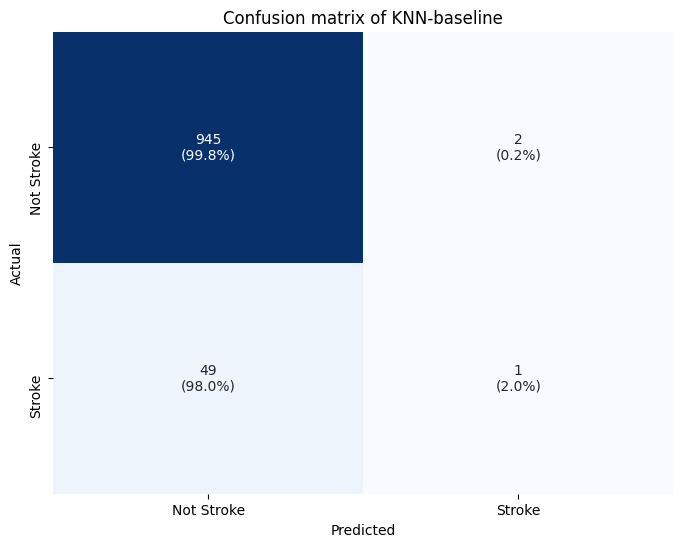

              precision    recall  f1-score   support

  Not Stroke       0.95      1.00      0.97       947
      Stroke       0.33      0.02      0.04        50

    accuracy                           0.95       997
   macro avg       0.64      0.51      0.51       997
weighted avg       0.92      0.95      0.93       997

Accuracy: 0.95
Precision: 0.92
Recall: 0.95
F1 Score (Weighted): 0.93
F1 Score (Macro): 0.93
AUC: 0.61


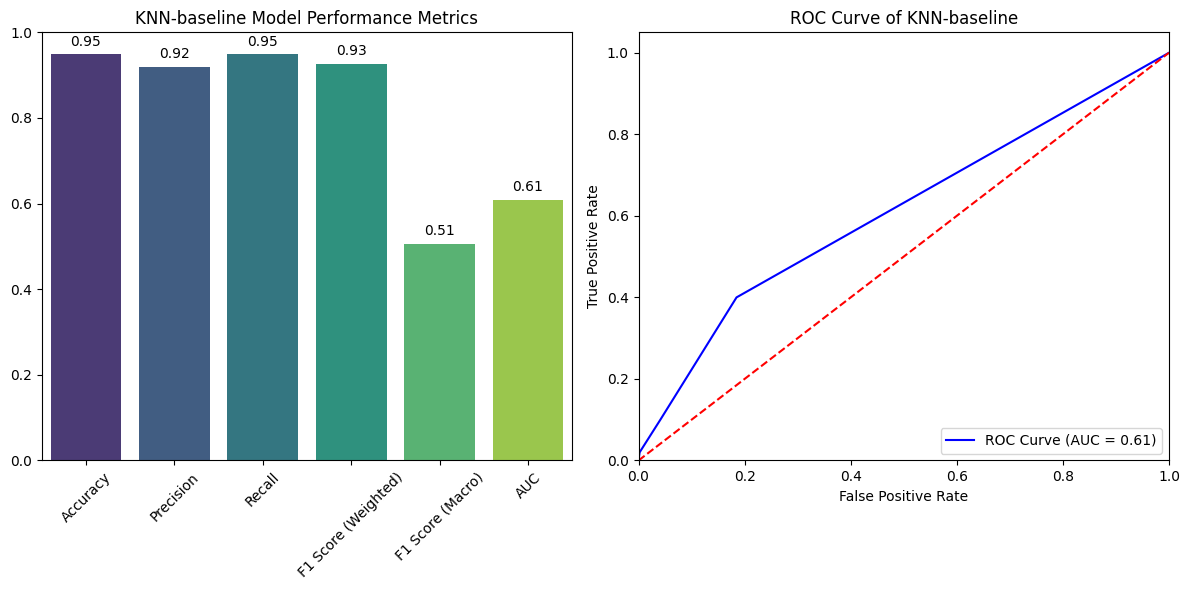

In [44]:
knn_baseline = KNeighborsClassifier()
knn_baseline.fit(X_train,y_train)
y_pred_knn_baseline = knn_baseline.predict(X_test)
y_pred_proba_knn_baseline=knn_baseline.predict_proba(X_test)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_knn_baseline,
    y_pred_proba_knn_baseline,
    target_encoder, 
    'Confusion matrix of KNN-baseline',
    'KNN-baseline'
)

### Gaussian Naive Bayes

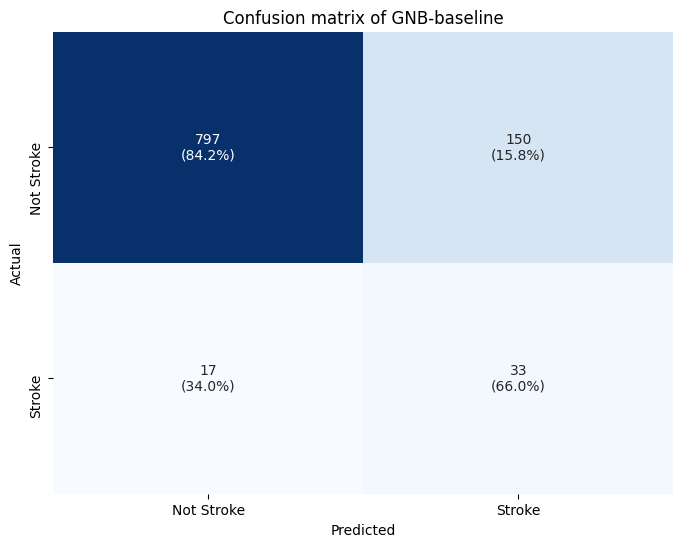

              precision    recall  f1-score   support

  Not Stroke       0.98      0.84      0.91       947
      Stroke       0.18      0.66      0.28        50

    accuracy                           0.83       997
   macro avg       0.58      0.75      0.59       997
weighted avg       0.94      0.83      0.87       997

Accuracy: 0.83
Precision: 0.94
Recall: 0.83
F1 Score (Weighted): 0.87
F1 Score (Macro): 0.87
AUC: 0.81


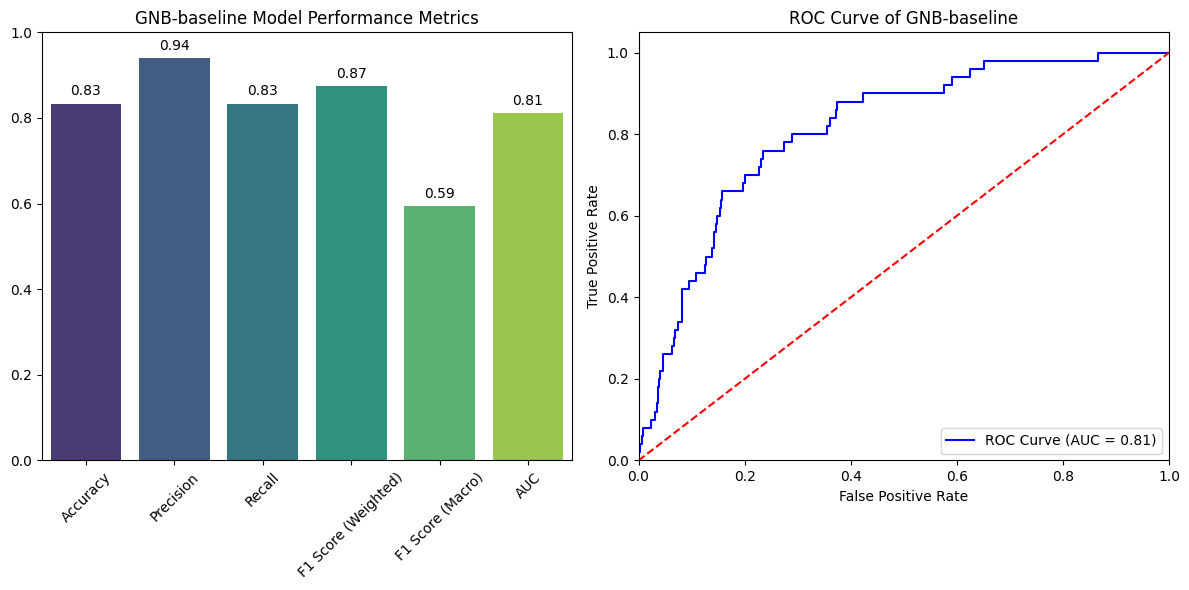

In [45]:
gnb_baseline = GaussianNB()
gnb_baseline.fit(X_train,y_train)
y_pred_gnb_baseline = gnb_baseline.predict(X_test)
y_pred_proba_gnb_baseline=gnb_baseline.predict_proba(X_test)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_gnb_baseline,
    y_pred_proba_gnb_baseline,
    target_encoder, 
    'Confusion matrix of GNB-baseline',
    'GNB-baseline'
)

### Analisis Model Baseline

**Analisis Model Baseline** <br>
1. Model Gaussian Naive Bayes relatif lebih baik daripada KNN. Hal ini secara intuisi dapat dilihat dari karakteristik dataset yang mayoritas didonimasi atribut kategorikal dibanding numerikal yang bisa dihitung dengan distance metrics seperti Euclidean pada KNN

## Proposed Model (Experiments)
***
Pada bagian ini dilakukan sejumlah eksperimen untuk mengusulkan model terbaik terhadap baseline. <br>

1. **Eksperimen 1**
- Menggunakan sejumlah model machine learning (hyperparameter default) yang lebih advanced daripada KNN dan Naive Bayes, seperti ensemble learning ataupun SVM
- Data train dan test sama seperti yang digunakan pada baseline

2. **Eksperimen 2**
- Fokus pada satu model terbaik dari hasil pada eksperimen 1
- Dilakukan seleksi fitur dengan menghilangkan fitur yang tidak relevan dari hasil perhitungan feature importance dengan ANOVA, Chi-Square, dan Mutual Information

3. **Ekspeirmen 3**
- Eksperimen 2 yang dijalankan kembali namun dengan menambahkan tahapan reduksi fitur dengan PCA

4. **Eksperimen 4**
- Model terbaik yang digunakan pada eksperimen 2
- Dilakukan sampling method pada data train dengan SMOTE, data test tidak diterapkan SMOTE

4. **Eksperimen 5**
- Eksperimen 4 dijalankan
- Dilakukan seleksi fitur + reduksi fitur

5. **Eksperimen 6**
- Eksperimen 5 dijalankan dengan model yang telah dilakukan hyperparameter tuning dengan Randomized Search

### Eksperimen 1

#### AdaBoost Algorithm

In [46]:
from sklearn.ensemble import AdaBoostClassifier

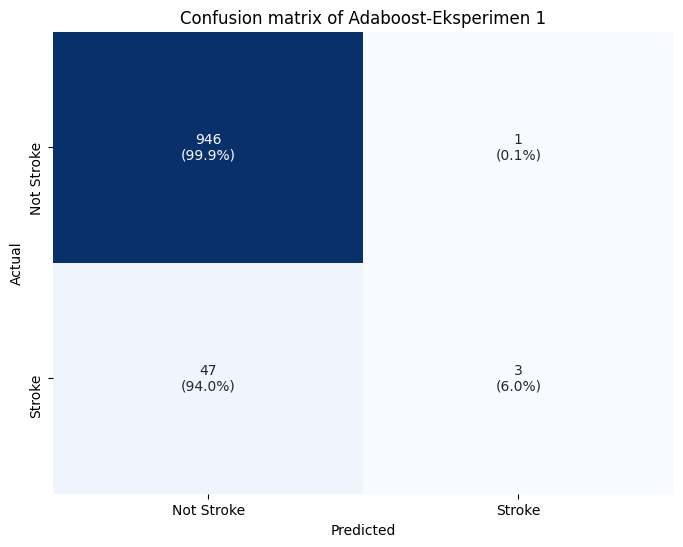

              precision    recall  f1-score   support

  Not Stroke       0.95      1.00      0.98       947
      Stroke       0.75      0.06      0.11        50

    accuracy                           0.95       997
   macro avg       0.85      0.53      0.54       997
weighted avg       0.94      0.95      0.93       997

Accuracy: 0.95
Precision: 0.94
Recall: 0.95
F1 Score (Weighted): 0.93
F1 Score (Macro): 0.93
AUC: 0.84


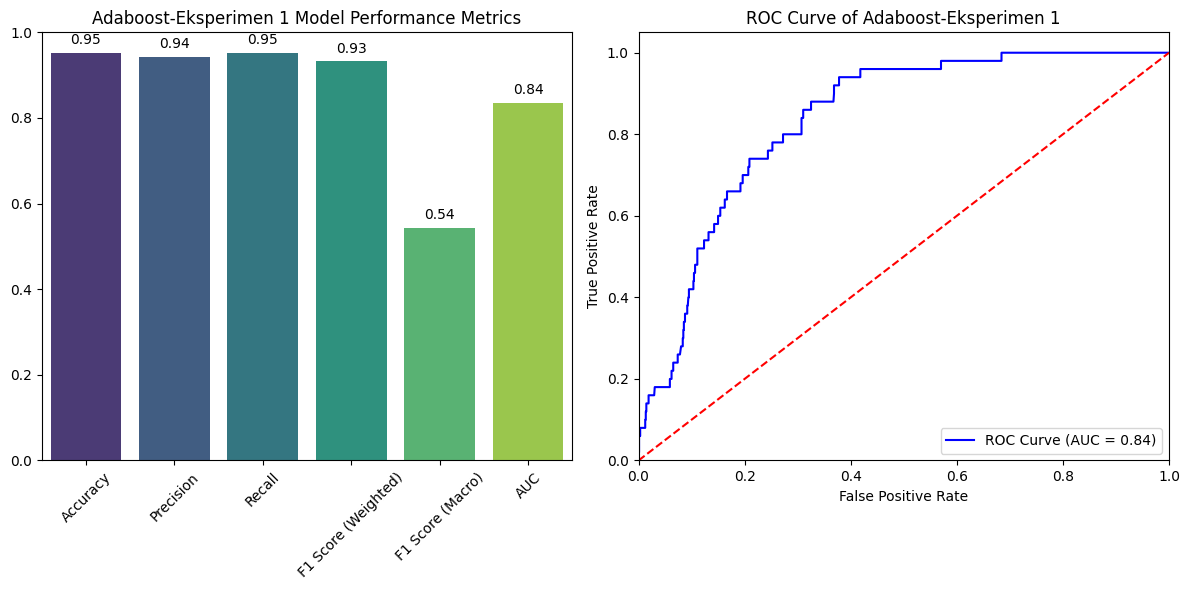

In [47]:
adaboost_eksperimen1 = AdaBoostClassifier()
adaboost_eksperimen1.fit(X_train,y_train)
y_pred_adaboost_eksperimen1 = adaboost_eksperimen1.predict(X_test)
y_pred_proba_adaboost_eksperimen1=adaboost_eksperimen1.predict_proba(X_test)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_adaboost_eksperimen1,
    y_pred_proba_adaboost_eksperimen1,
    target_encoder, 
    'Confusion matrix of Adaboost-Eksperimen 1',
    'Adaboost-Eksperimen 1'
)

#### XGBClassifier

In [48]:
from xgboost import XGBClassifier

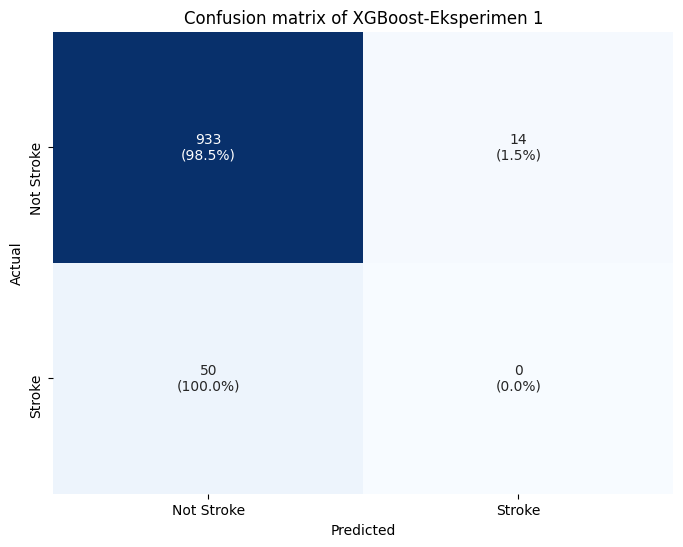

              precision    recall  f1-score   support

  Not Stroke       0.95      0.99      0.97       947
      Stroke       0.00      0.00      0.00        50

    accuracy                           0.94       997
   macro avg       0.47      0.49      0.48       997
weighted avg       0.90      0.94      0.92       997

Accuracy: 0.94
Precision: 0.90
Recall: 0.94
F1 Score (Weighted): 0.92
F1 Score (Macro): 0.92
AUC: 0.78


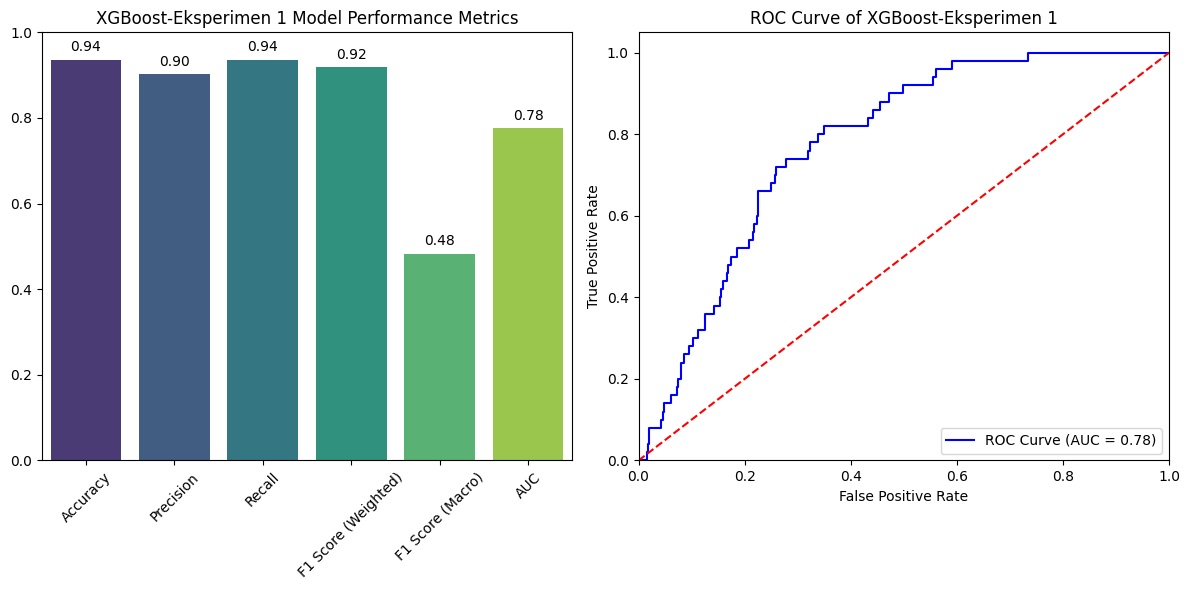

In [49]:
xgboost_eksperimen1 = XGBClassifier()
xgboost_eksperimen1.fit(X_train,y_train)
y_pred_xgboost_eksperimen1 = xgboost_eksperimen1.predict(X_test)
y_pred_proba_xgboost_eksperimen1=xgboost_eksperimen1.predict_proba(X_test)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_xgboost_eksperimen1,
    y_pred_proba_xgboost_eksperimen1,
    target_encoder, 
    'Confusion matrix of XGBoost-Eksperimen 1',
    'XGBoost-Eksperimen 1'
)

#### Gradient Boosting

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

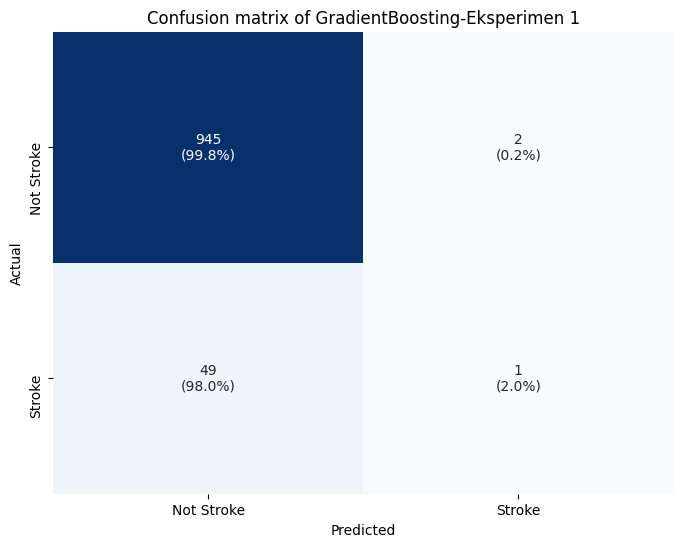

              precision    recall  f1-score   support

  Not Stroke       0.95      1.00      0.97       947
      Stroke       0.33      0.02      0.04        50

    accuracy                           0.95       997
   macro avg       0.64      0.51      0.51       997
weighted avg       0.92      0.95      0.93       997

Accuracy: 0.95
Precision: 0.92
Recall: 0.95
F1 Score (Weighted): 0.93
F1 Score (Macro): 0.93
AUC: 0.85


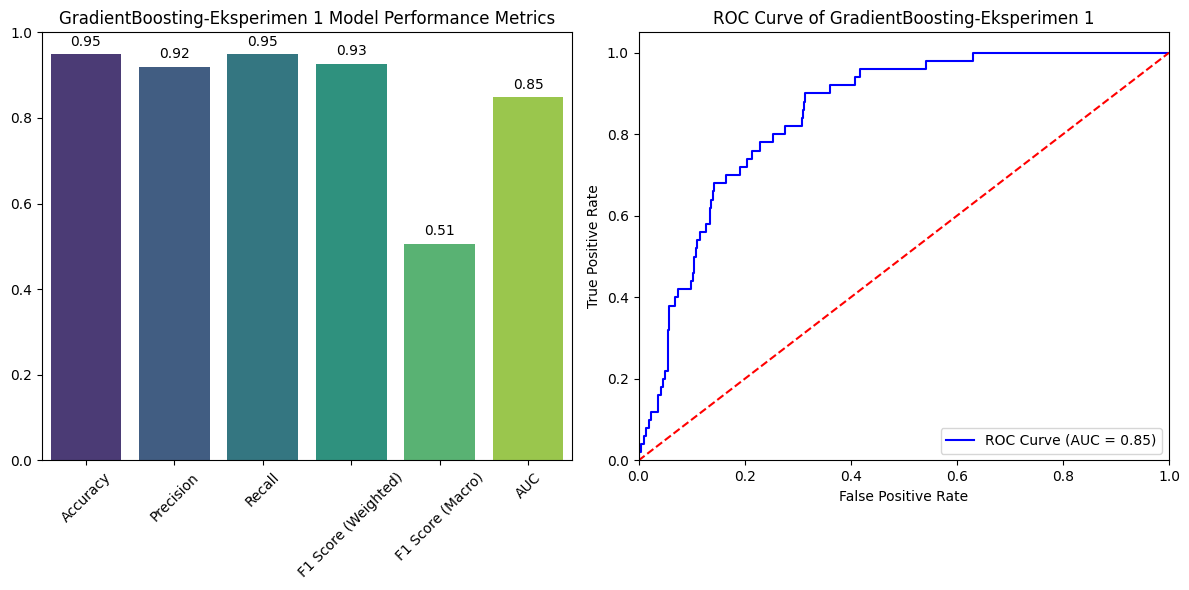

In [51]:
gradientboost_eksperimen1 = GradientBoostingClassifier()
gradientboost_eksperimen1.fit(X_train,y_train)
y_pred_gradientboost_eksperimen1 = gradientboost_eksperimen1.predict(X_test)
y_pred_proba_gradientboost_eksperimen1=gradientboost_eksperimen1.predict_proba(X_test)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_gradientboost_eksperimen1,
    y_pred_proba_gradientboost_eksperimen1,
    target_encoder, 
    'Confusion matrix of GradientBoosting-Eksperimen 1',
    'GradientBoosting-Eksperimen 1'
)

#### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

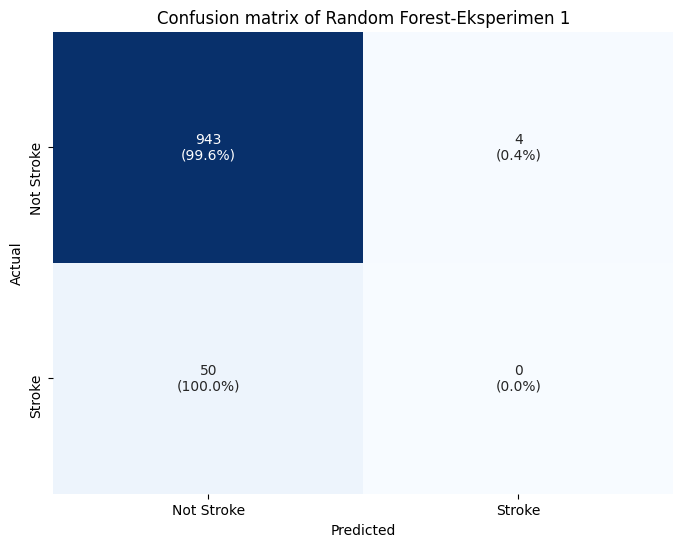

              precision    recall  f1-score   support

  Not Stroke       0.95      1.00      0.97       947
      Stroke       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.92       997

Accuracy: 0.95
Precision: 0.90
Recall: 0.95
F1 Score (Weighted): 0.92
F1 Score (Macro): 0.92
AUC: 0.75


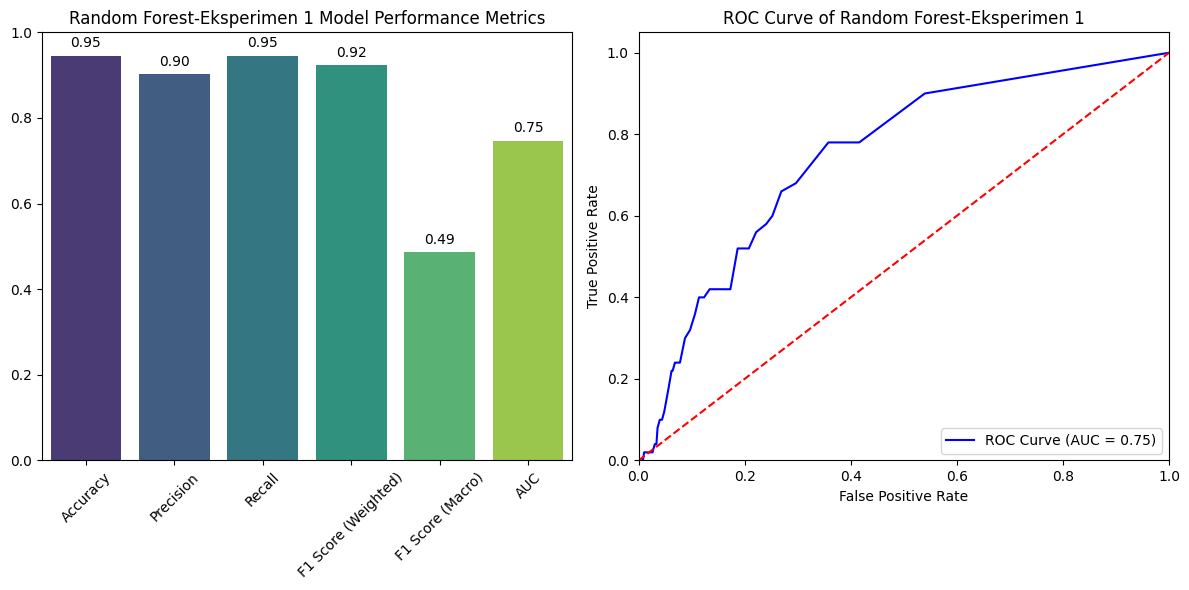

In [53]:
randomforest_eksperimen1 = RandomForestClassifier()
randomforest_eksperimen1.fit(X_train,y_train)
y_pred_randomforest_eksperimen1 = randomforest_eksperimen1.predict(X_test)
y_pred_proba_randomforest_eksperimen1=randomforest_eksperimen1.predict_proba(X_test)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_randomforest_eksperimen1,
    y_pred_proba_randomforest_eksperimen1,
    target_encoder, 
    'Confusion matrix of Random Forest-Eksperimen 1',
    'Random Forest-Eksperimen 1'
)

#### SVM

In [54]:
from sklearn.svm import SVC

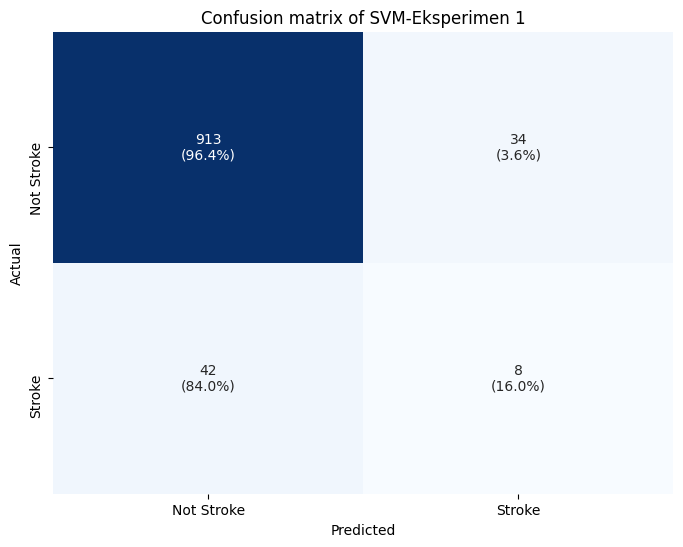

              precision    recall  f1-score   support

  Not Stroke       0.96      0.96      0.96       947
      Stroke       0.19      0.16      0.17        50

    accuracy                           0.92       997
   macro avg       0.57      0.56      0.57       997
weighted avg       0.92      0.92      0.92       997

Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score (Weighted): 0.92
F1 Score (Macro): 0.92
AUC: 0.71


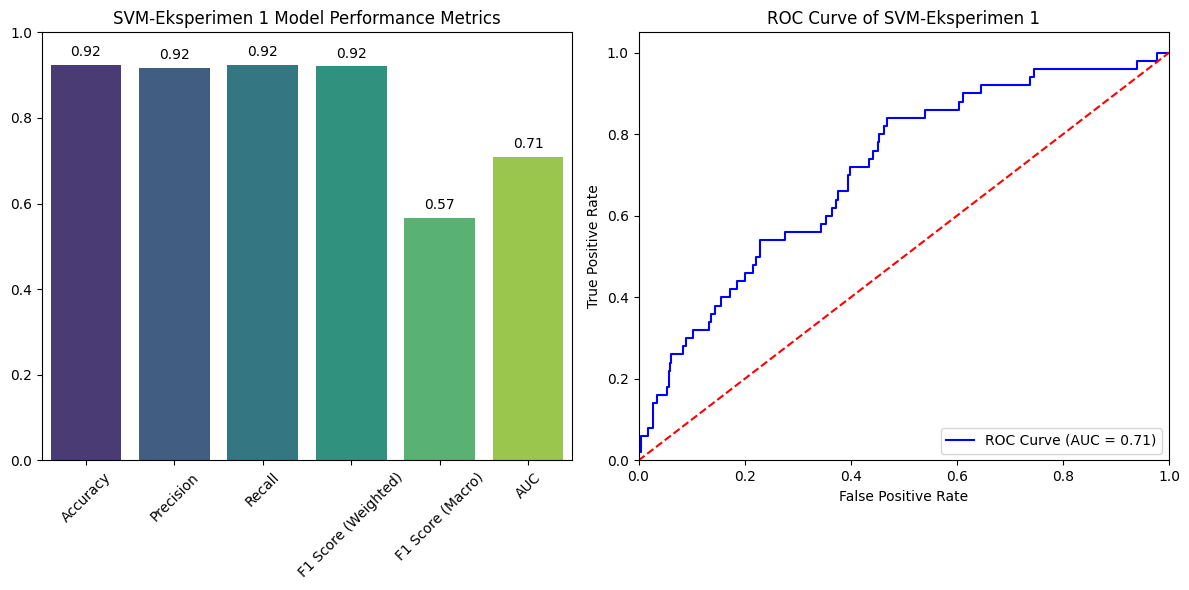

In [55]:
svm_eksperimen1 = SVC(probability=True, kernel='sigmoid')
svm_eksperimen1.fit(X_train,y_train)
y_pred_svm_eksperimen1 = svm_eksperimen1.predict(X_test)
y_pred_proba_svm_eksperimen1=svm_eksperimen1.predict_proba(X_test)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_svm_eksperimen1,
    y_pred_proba_svm_eksperimen1,
    target_encoder, 
    'Confusion matrix of SVM-Eksperimen 1',
    'SVM-Eksperimen 1'
)

#### Analisis Eksperimen 1

**Analisis** <br>
1. Jika dilihat dari hasil model ensemble tipe Boosting, model **Gradient Boosting** (85%) dan **Adaboost** (84%) tampil relatif lebih baik daripada model XGBoost ataupun model ensemble bagging seperti Random Forest classifier jika ditinjau dari nilai AUC
2. Model SVM secara default hyparameter menggunakan kernel='rbf', pada karakteristik data ini digunakan kernel='sigmoid' karena melihat kecenderungan data terklasifikasi ke dalam dua kelas saja. Penggantian tersebut memberikan performa relatif lebih baik daripada menggunakan kernel='rbf'

### Eksperimen 2
***
Model terbaik dari Eksperimen 1 yaitu **Gradient Boosting** dan **Adaboost** (terbaik kedua) akan digunakan pada eksperimen ini untuk melihat pengaruh seleksi fitur

In [56]:
# get irrelevant columns
irrelevant_features = ['gender', 'Residence_type', 'bmi']
irrelevant_columns = []
for irrelevant_features in irrelevant_features:
    for col in brain_df.columns:
        if col.startswith(irrelevant_features):
            irrelevant_columns.append(col)

# drop irrelevant columns on X_train and X_test
X_train_eksperimen2 = X_train.drop(irrelevant_columns, axis=1).copy()
X_test_eksperimen2 = X_test.drop(irrelevant_columns, axis=1).copy()

#### Gradient Boosting

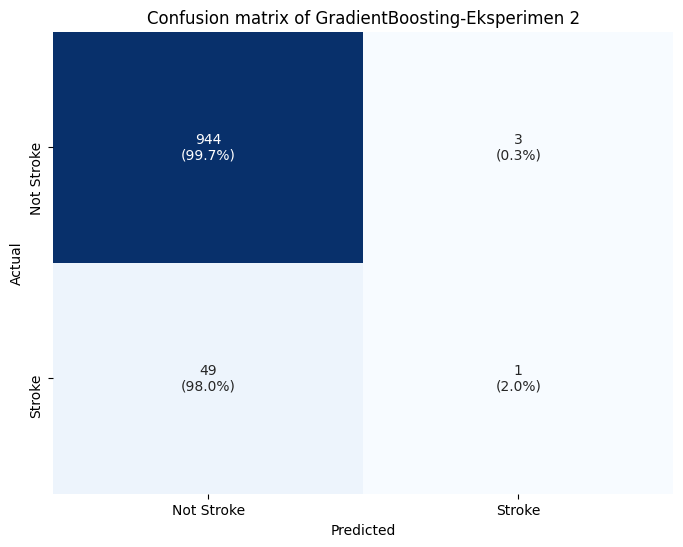

              precision    recall  f1-score   support

  Not Stroke       0.95      1.00      0.97       947
      Stroke       0.25      0.02      0.04        50

    accuracy                           0.95       997
   macro avg       0.60      0.51      0.51       997
weighted avg       0.92      0.95      0.93       997

Accuracy: 0.95
Precision: 0.92
Recall: 0.95
F1 Score (Weighted): 0.93
F1 Score (Macro): 0.93
AUC: 0.84


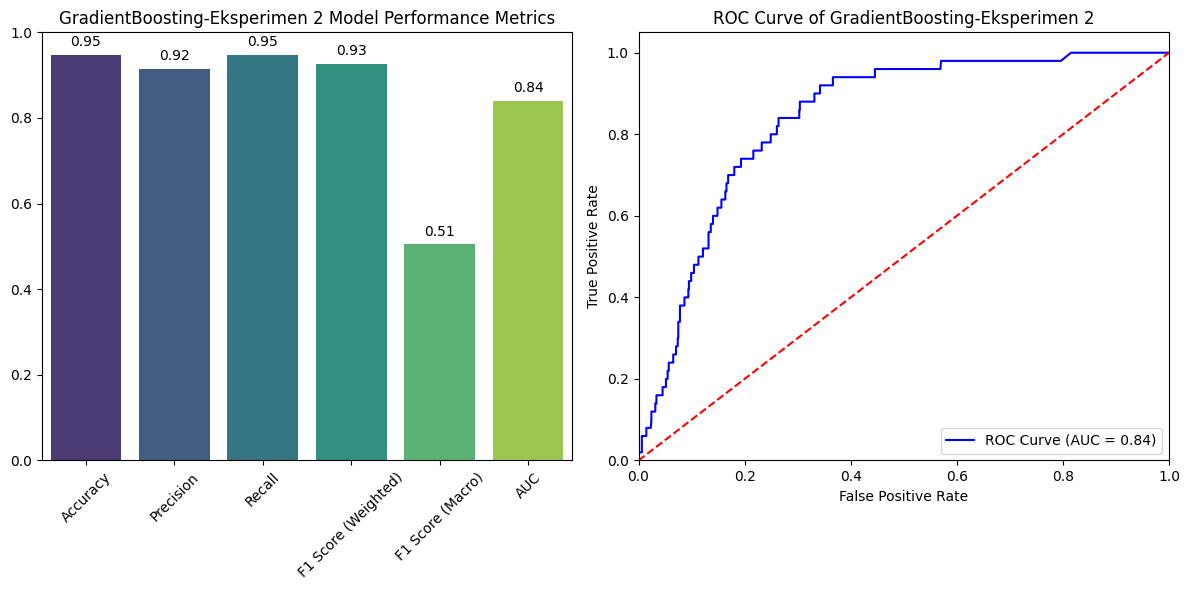

In [57]:
gradientboost_eksperimen2 = GradientBoostingClassifier()
gradientboost_eksperimen2.fit(X_train_eksperimen2,y_train)
y_pred_gradientboost_eksperimen2 = gradientboost_eksperimen2.predict(X_test_eksperimen2)
y_pred_proba_gradientboost_eksperimen2=gradientboost_eksperimen2.predict_proba(X_test_eksperimen2)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_gradientboost_eksperimen2,
    y_pred_proba_gradientboost_eksperimen2,
    target_encoder, 
    'Confusion matrix of GradientBoosting-Eksperimen 2',
    'GradientBoosting-Eksperimen 2'
)

#### AdaBoost

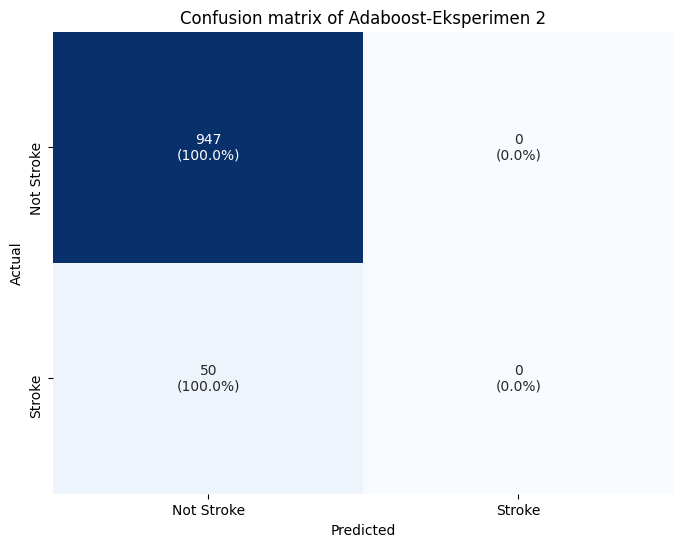

C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

              precision    recall  f1-score   support

  Not Stroke       0.95      1.00      0.97       947
      Stroke       0.00      0.00      0.00        50

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997

Accuracy: 0.95
Precision: 0.90
Recall: 0.95
F1 Score (Weighted): 0.93
F1 Score (Macro): 0.93
AUC: 0.84


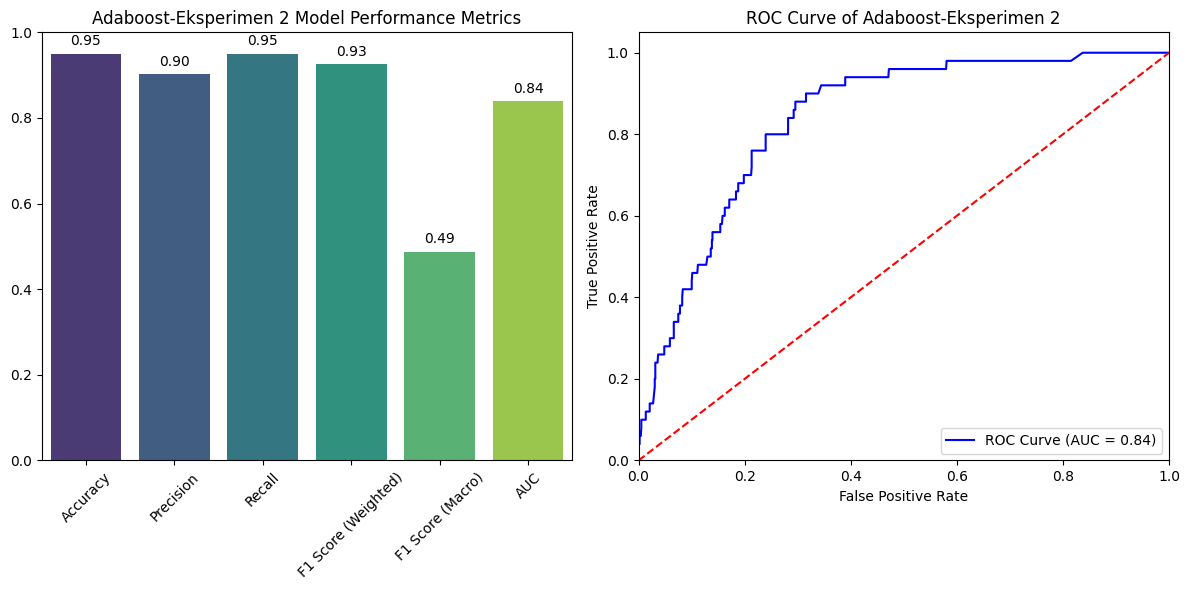

In [58]:
adaboost_eksperimen2 = AdaBoostClassifier()
adaboost_eksperimen2.fit(X_train_eksperimen2,y_train)
y_pred_adaboost_eksperimen2 = adaboost_eksperimen2.predict(X_test_eksperimen2)
y_pred_proba_adaboost_eksperimen2=adaboost_eksperimen2.predict_proba(X_test_eksperimen2)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_adaboost_eksperimen2,
    y_pred_proba_adaboost_eksperimen2,
    target_encoder, 
    'Confusion matrix of Adaboost-Eksperimen 2',
    'Adaboost-Eksperimen 2'
)

#### Analisis
***
1. Penerapan seleksi fitur dengan menghapus fitur irelevant hasil perhitungan Chi-Square, Mutual Information, dan ANOVA tidak selalu dapat meningkatkan performa score. Bahkan terjadi penurunan performa AUC terhadap model terbaik hasil eksperimen 1 ketika menerapkan seleksi fitur

### Eksperimen 3

In [59]:
from sklearn.decomposition import PCA

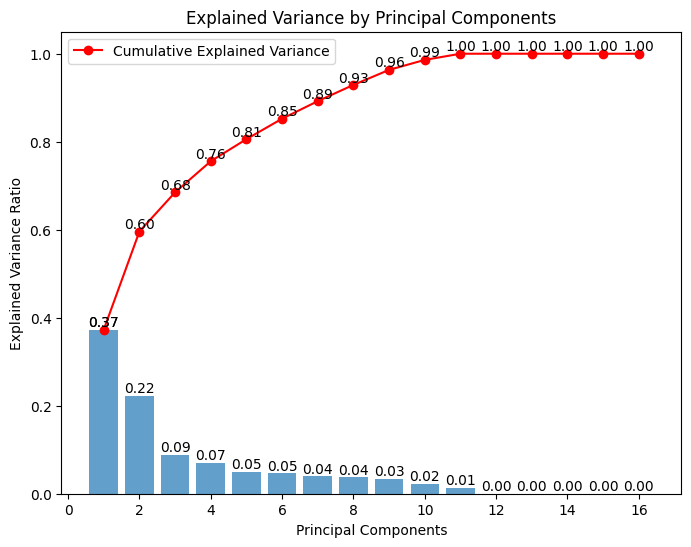

In [60]:
# model reduksi fitur
pca = PCA()
pca.fit(X_train_eksperimen2)

# Get the explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance
plt.figure(figsize=(8,6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')

# Show cumulative explained variance as a line plot
cumulative_variance = np.cumsum(explained_variance)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', color='r', label='Cumulative Explained Variance')

# Annotate the plot with variance values
for i, (ev, cv) in enumerate(zip(explained_variance, cumulative_variance)):
    plt.text(i+1, ev, f'{ev:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i+1, cv, f'{cv:.2f}', ha='center', va='bottom', fontsize=10)

plt.legend(loc='best')
plt.show()

**Analisis hasil PCA** dari hasil perhitungan variance di tiap Principal Componentnya, dengan mempertahankan 8 principal component (reduksi fitur dari 16 fitur pada X_train_eksperimen2) informasi yang tertahankan yaitu 93% dengan mengurangi 50% fitur

In [61]:
# model reduksi fitur
pca = PCA(n_components=8)
pca.fit(X_train_eksperimen2)
X_train_eksperimen3 = pca.transform(X_train_eksperimen2)
X_test_eksperimen3 = pca.transform(X_test_eksperimen2)

#### Gradient Boosting

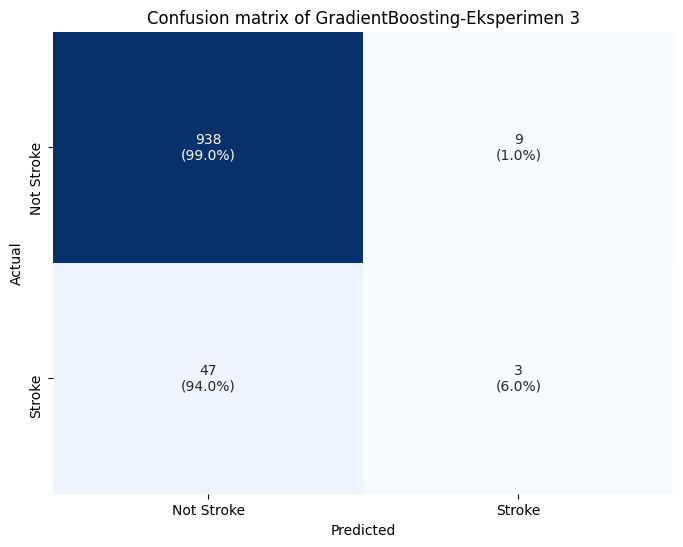

              precision    recall  f1-score   support

  Not Stroke       0.95      0.99      0.97       947
      Stroke       0.25      0.06      0.10        50

    accuracy                           0.94       997
   macro avg       0.60      0.53      0.53       997
weighted avg       0.92      0.94      0.93       997

Accuracy: 0.94
Precision: 0.92
Recall: 0.94
F1 Score (Weighted): 0.93
F1 Score (Macro): 0.93
AUC: 0.82


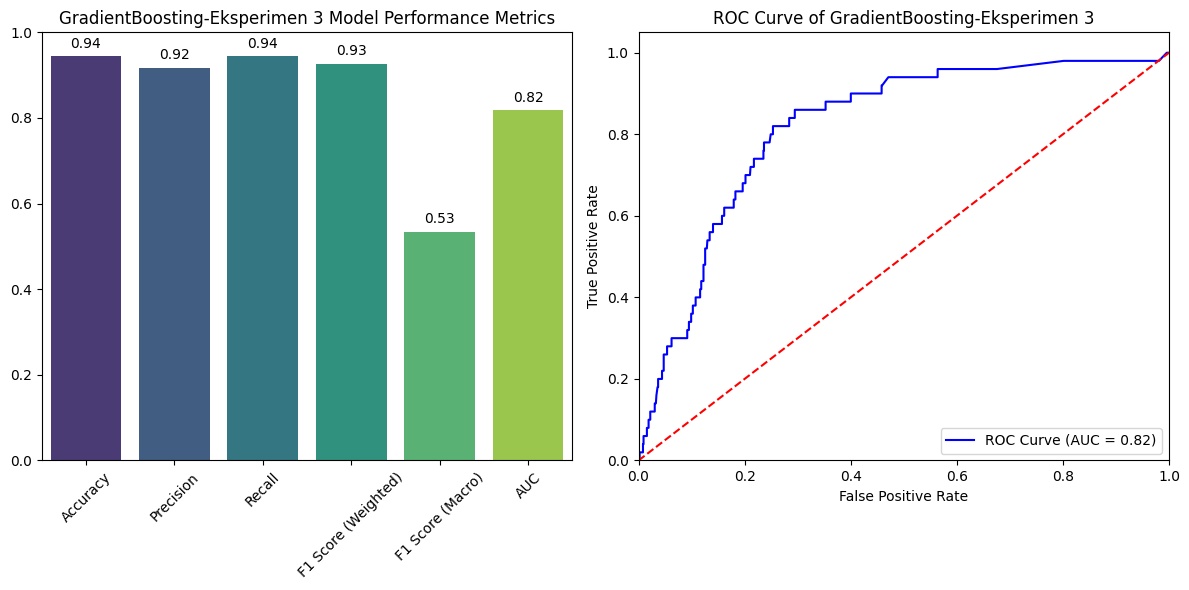

In [62]:
gradientboost_eksperimen3 = GradientBoostingClassifier()
gradientboost_eksperimen3.fit(X_train_eksperimen3,y_train)
y_pred_gradientboost_eksperimen3 = gradientboost_eksperimen3.predict(X_test_eksperimen3)
y_pred_proba_gradientboost_eksperimen3=gradientboost_eksperimen3.predict_proba(X_test_eksperimen3)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_gradientboost_eksperimen3,
    y_pred_proba_gradientboost_eksperimen3,
    target_encoder, 
    'Confusion matrix of GradientBoosting-Eksperimen 3',
    'GradientBoosting-Eksperimen 3'
)

#### AdaBoost

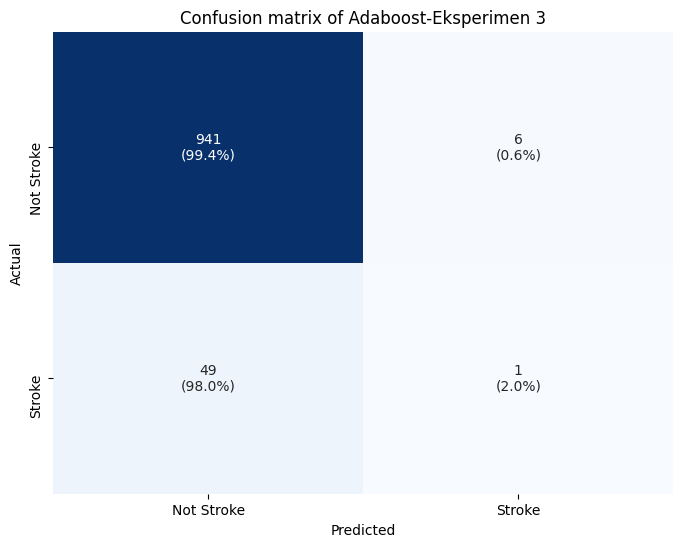

              precision    recall  f1-score   support

  Not Stroke       0.95      0.99      0.97       947
      Stroke       0.14      0.02      0.04        50

    accuracy                           0.94       997
   macro avg       0.55      0.51      0.50       997
weighted avg       0.91      0.94      0.92       997

Accuracy: 0.94
Precision: 0.91
Recall: 0.94
F1 Score (Weighted): 0.92
F1 Score (Macro): 0.92
AUC: 0.82


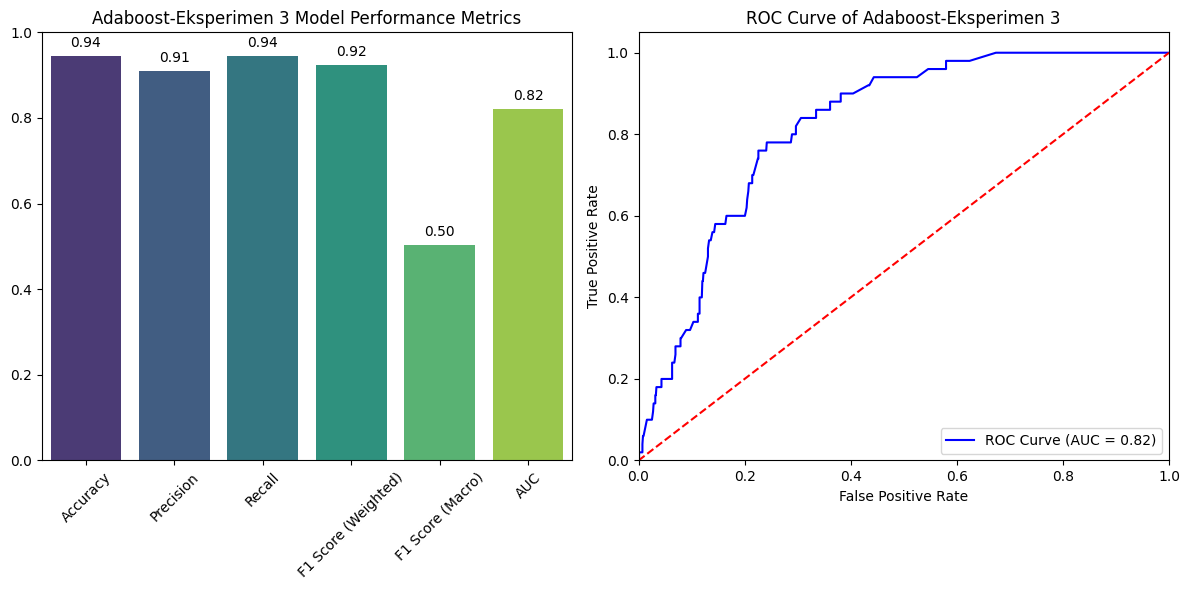

In [63]:
adaboost_eksperimen3 = AdaBoostClassifier()
adaboost_eksperimen3.fit(X_train_eksperimen3,y_train)
y_pred_adaboost_eksperimen3 = adaboost_eksperimen3.predict(X_test_eksperimen3)
y_pred_proba_adaboost_eksperimen3=adaboost_eksperimen3.predict_proba(X_test_eksperimen3)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_adaboost_eksperimen3,
    y_pred_proba_adaboost_eksperimen3,
    target_encoder, 
    'Confusion matrix of Adaboost-Eksperimen 3',
    'Adaboost-Eksperimen 3'
)

#### Analisis
***
1. Reduksi fitur dengan menghilangkan sekitar 7% informasi dari dataset ternyata menurunkan tingkat performa model. Hal ini serupa dengan penerapan seleksi fitur yang tidak dapat meningkatkan performa model klasifikasi

### Eksperimen 4

In [64]:
from imblearn.over_sampling import SMOTE

# apply SMOTE on X_train
smote = SMOTE(sampling_strategy='minority', k_neighbors=7, random_state=13)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### Gradient Boosting

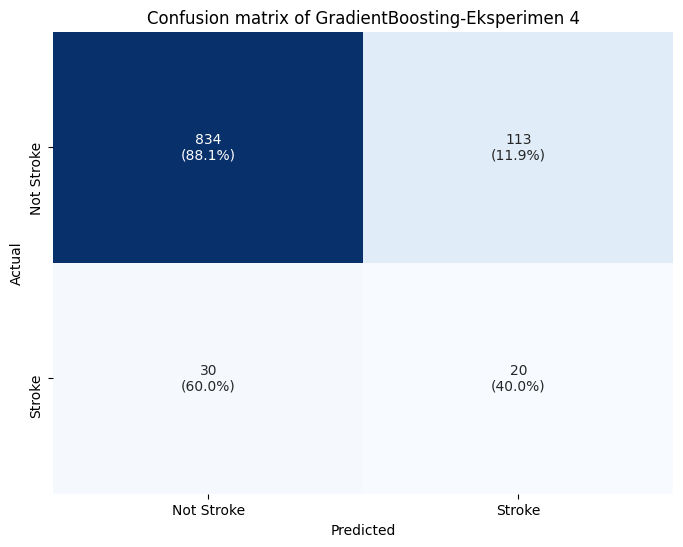

              precision    recall  f1-score   support

  Not Stroke       0.97      0.88      0.92       947
      Stroke       0.15      0.40      0.22        50

    accuracy                           0.86       997
   macro avg       0.56      0.64      0.57       997
weighted avg       0.92      0.86      0.89       997

Accuracy: 0.86
Precision: 0.92
Recall: 0.86
F1 Score (Weighted): 0.89
F1 Score (Macro): 0.89
AUC: 0.82


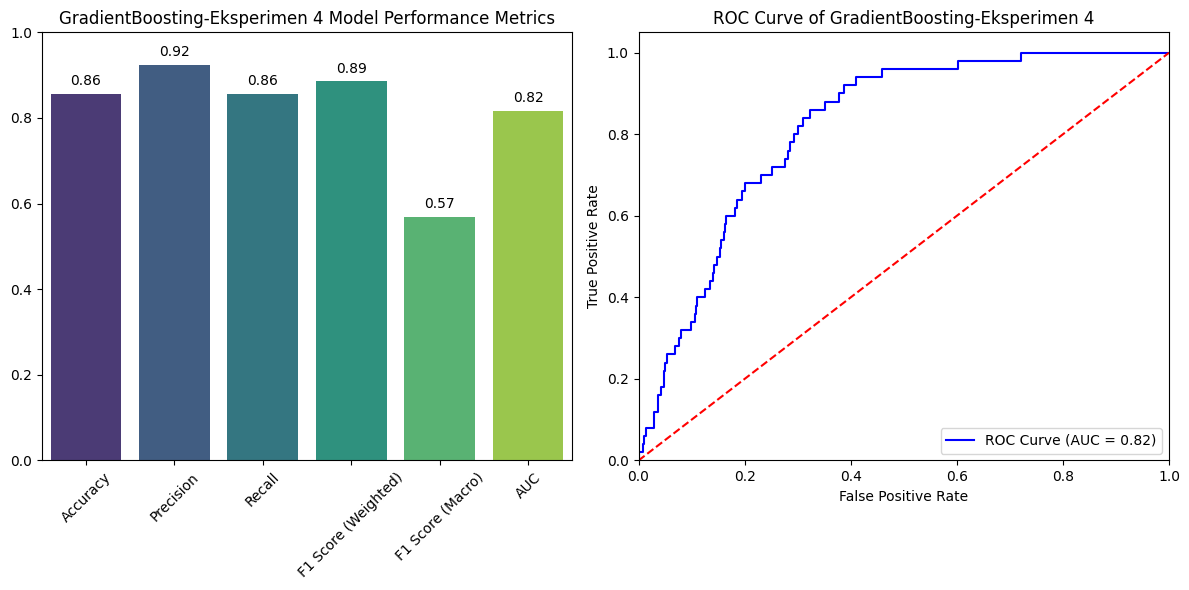

In [65]:
gradientboost_eksperimen4 = GradientBoostingClassifier()
gradientboost_eksperimen4.fit(X_train_smote,y_train_smote)
y_pred_gradientboost_eksperimen4 = gradientboost_eksperimen4.predict(X_test)
y_pred_proba_gradientboost_eksperimen4=gradientboost_eksperimen4.predict_proba(X_test)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_gradientboost_eksperimen4,
    y_pred_proba_gradientboost_eksperimen4,
    target_encoder, 
    'Confusion matrix of GradientBoosting-Eksperimen 4',
    'GradientBoosting-Eksperimen 4'
)

#### AdaBoost

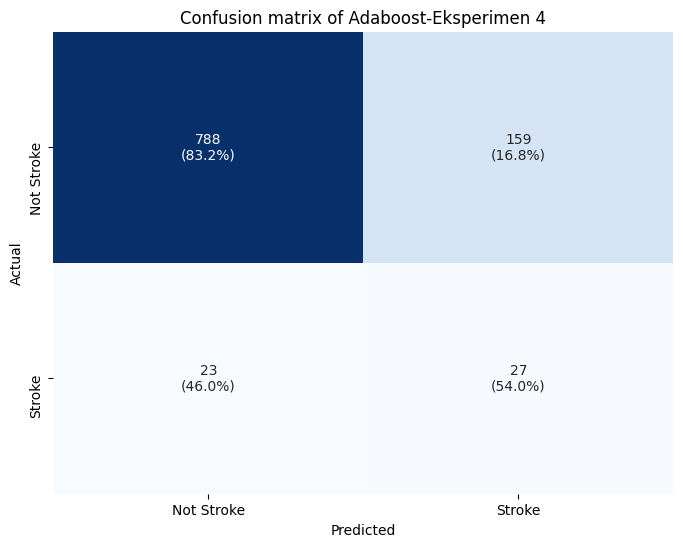

              precision    recall  f1-score   support

  Not Stroke       0.97      0.83      0.90       947
      Stroke       0.15      0.54      0.23        50

    accuracy                           0.82       997
   macro avg       0.56      0.69      0.56       997
weighted avg       0.93      0.82      0.86       997

Accuracy: 0.82
Precision: 0.93
Recall: 0.82
F1 Score (Weighted): 0.86
F1 Score (Macro): 0.86
AUC: 0.83


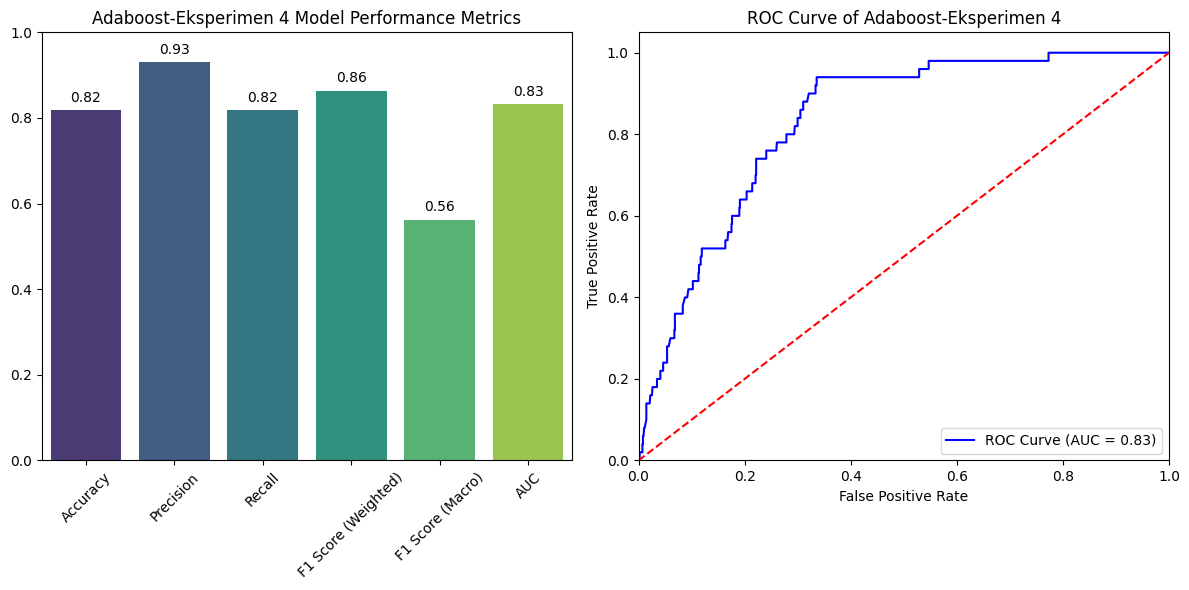

In [66]:
adaboost_eksperimen4 = AdaBoostClassifier()
adaboost_eksperimen4.fit(X_train_smote,y_train_smote)
y_pred_adaboost_eksperimen4 = adaboost_eksperimen4.predict(X_test)
y_pred_proba_adaboost_eksperimen4=adaboost_eksperimen4.predict_proba(X_test)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_adaboost_eksperimen4,
    y_pred_proba_adaboost_eksperimen4,
    target_encoder, 
    'Confusion matrix of Adaboost-Eksperimen 4',
    'Adaboost-Eksperimen 4'
)

### Eksperimen 5

In [67]:
X_train_eksperimen5 = X_train_smote.drop(irrelevant_columns, axis=1).copy()
X_test_eksperimen5 = X_test.drop(irrelevant_columns, axis=1).copy()

pca_eksperimen_5 = PCA(n_components=8)
X_train_eksperimen5 = pca_eksperimen_5.fit_transform(X_train_eksperimen5)
X_test_eksperimen5 = pca_eksperimen_5.transform(X_test_eksperimen5)

#### Gradient Boosting

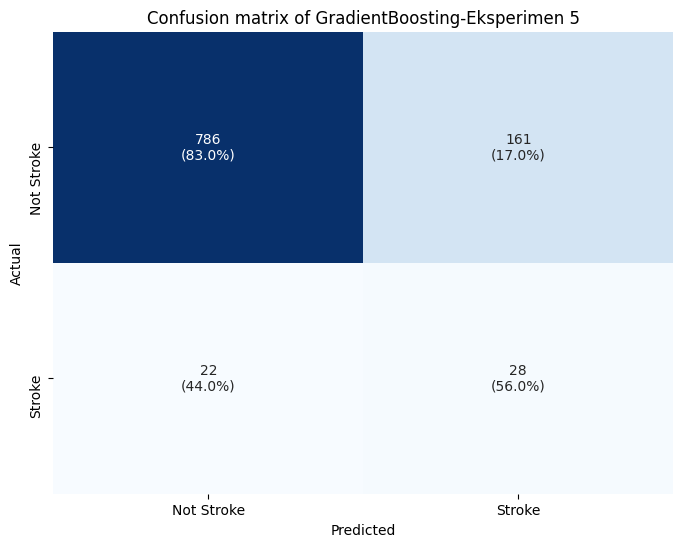

              precision    recall  f1-score   support

  Not Stroke       0.97      0.83      0.90       947
      Stroke       0.15      0.56      0.23        50

    accuracy                           0.82       997
   macro avg       0.56      0.69      0.57       997
weighted avg       0.93      0.82      0.86       997

Accuracy: 0.82
Precision: 0.93
Recall: 0.82
F1 Score (Weighted): 0.86
F1 Score (Macro): 0.86
AUC: 0.81


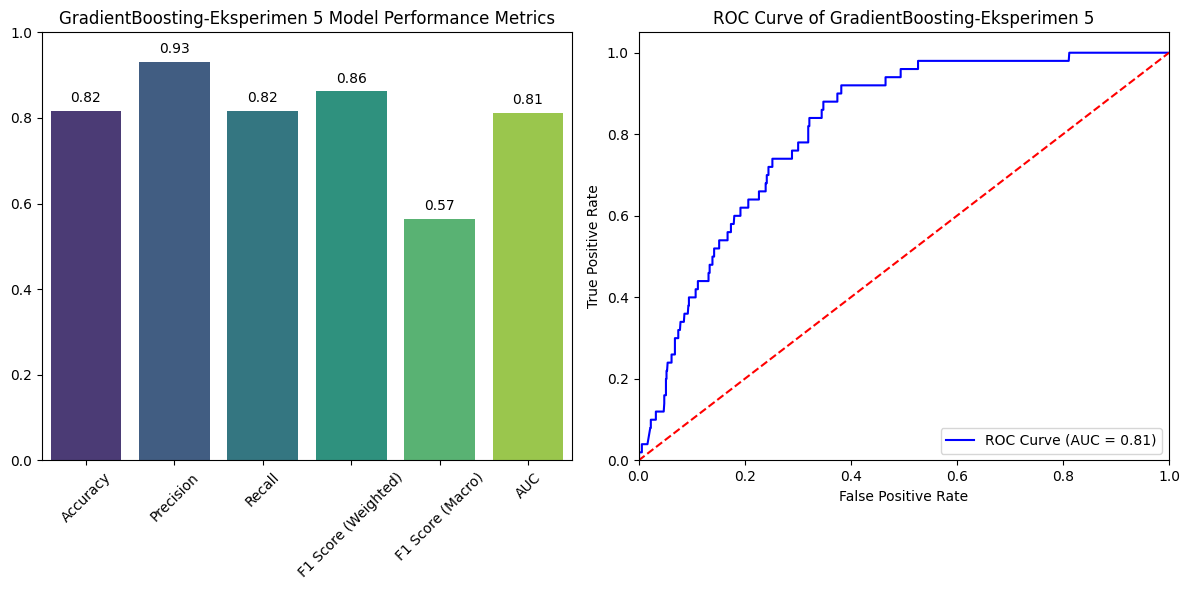

In [68]:
gradientboost_eksperimen5 = GradientBoostingClassifier()
gradientboost_eksperimen5.fit(X_train_eksperimen5,y_train_smote)
y_pred_gradientboost_eksperimen5 = gradientboost_eksperimen5.predict(X_test_eksperimen5)
y_pred_proba_gradientboost_eksperimen5=gradientboost_eksperimen5.predict_proba(X_test_eksperimen5)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_gradientboost_eksperimen5,
    y_pred_proba_gradientboost_eksperimen5,
    target_encoder, 
    'Confusion matrix of GradientBoosting-Eksperimen 5',
    'GradientBoosting-Eksperimen 5'
)

#### AdaBoost

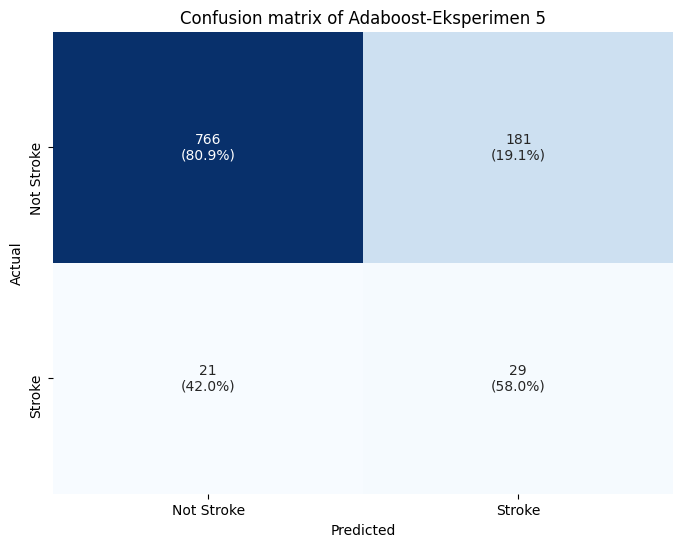

              precision    recall  f1-score   support

  Not Stroke       0.97      0.81      0.88       947
      Stroke       0.14      0.58      0.22        50

    accuracy                           0.80       997
   macro avg       0.56      0.69      0.55       997
weighted avg       0.93      0.80      0.85       997

Accuracy: 0.80
Precision: 0.93
Recall: 0.80
F1 Score (Weighted): 0.85
F1 Score (Macro): 0.85
AUC: 0.79


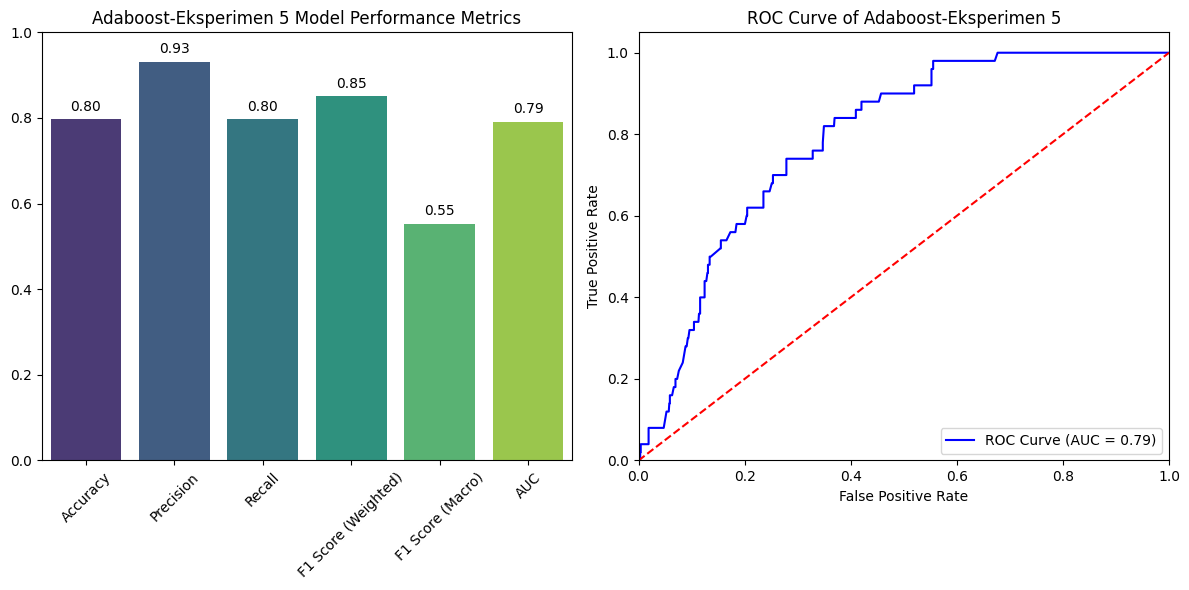

In [69]:
adaboost_eksperimen5 = AdaBoostClassifier()
adaboost_eksperimen5.fit(X_train_eksperimen5,y_train_smote)
y_pred_adaboost_eksperimen5 = adaboost_eksperimen5.predict(X_test_eksperimen5)
y_pred_proba_adaboost_eksperimen5=adaboost_eksperimen5.predict_proba(X_test_eksperimen5)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_adaboost_eksperimen5,
    y_pred_proba_adaboost_eksperimen5,
    target_encoder, 
    'Confusion matrix of Adaboost-Eksperimen 5',
    'Adaboost-Eksperimen 5'
)

### Eksperimen 6

#### Gradient Boosting

In [70]:
# hyperparameter tuning for Gradient Boosting and AdaBoost using X_train_smote first and Randomized Search

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Define the parameter grids
param_grid_gb = {
    'n_estimators': [i for i in range(50,250, 25)],
    'learning_rate': np.linspace(0.01, 1, 10),
    'max_depth': [3, 4, 5, 6,7],
    'subsample': np.linspace(0.6, 1.0, 5)
}

# Randomized Search for Gradient Boosting
random_search_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_grid_gb,
    n_iter=30,  # Number of random combinations to try
    scoring='f1_macro',  # Evaluation metric
    cv=5,  # Cross-validation folds
    verbose=1,
    random_state=42
)
random_search_gb.fit(X_train_eksperimen5, y_train_smote)

# Best hyperparameters found
print("Best hyperparameters for Gradient Boosting:", random_search_gb.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters for Gradient Boosting: {'subsample': 0.9, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.12}


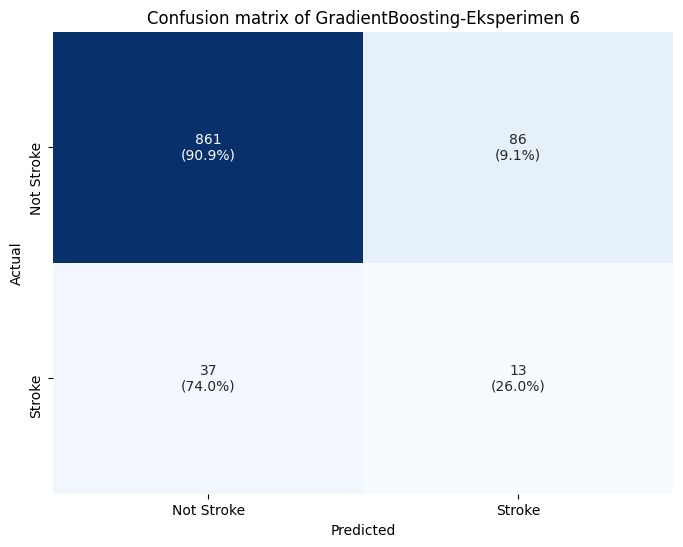

              precision    recall  f1-score   support

  Not Stroke       0.96      0.91      0.93       947
      Stroke       0.13      0.26      0.17        50

    accuracy                           0.88       997
   macro avg       0.55      0.58      0.55       997
weighted avg       0.92      0.88      0.90       997

Accuracy: 0.88
Precision: 0.92
Recall: 0.88
F1 Score (Weighted): 0.90
F1 Score (Macro): 0.90
AUC: 0.78


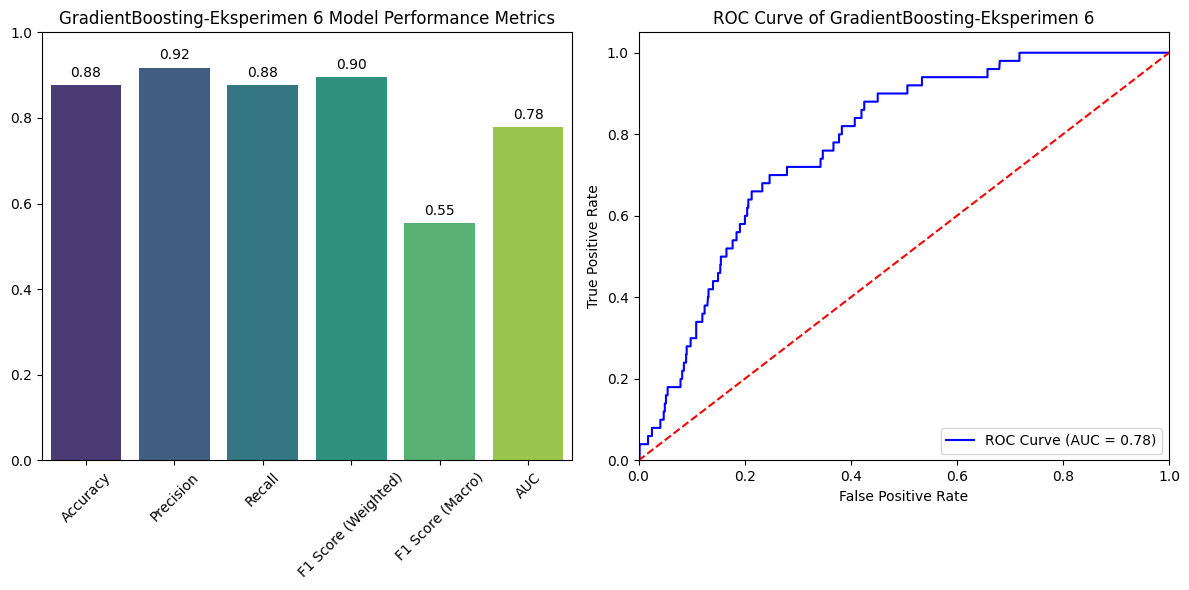

In [71]:
# rerunning eksperimen 5 using best model (configure with best hyperparameter)
gradientboost_eksperimen6 = random_search_gb.best_estimator_
gradientboost_eksperimen6.fit(X_train_eksperimen5,y_train_smote)
y_pred_gradientboost_eksperimen6 = gradientboost_eksperimen6.predict(X_test_eksperimen5)
y_pred_proba_gradientboost_eksperimen6=gradientboost_eksperimen6.predict_proba(X_test_eksperimen5)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_gradientboost_eksperimen6,
    y_pred_proba_gradientboost_eksperimen6,
    target_encoder, 
    'Confusion matrix of GradientBoosting-Eksperimen 6',
    'GradientBoosting-Eksperimen 6'
)

#### AdaBoost 

In [72]:
# AdaBoost Classifier
adb = AdaBoostClassifier()

param_grid_adb = {
    'n_estimators': [i for i in range(50,250, 25)],
    'learning_rate': np.linspace(0.01, 1, 10)
}

# Randomized Search for AdaBoost
random_search_adb = RandomizedSearchCV(
    estimator=adb,
    param_distributions=param_grid_adb,
    n_iter=30,  # Number of random combinations to try
    scoring='f1_macro',
    cv=5,
    verbose=1,
    random_state=42
)

# Fit the models
random_search_adb.fit(X_train_eksperimen5, y_train_smote)
print("Best hyperparameters for AdaBoost:", random_search_adb.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best hyperparameters for AdaBoost: {'n_estimators': 200, 'learning_rate': 0.78}


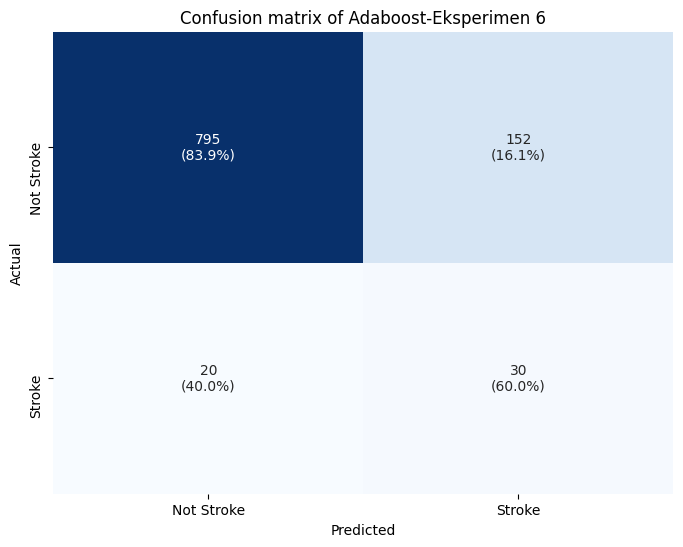

              precision    recall  f1-score   support

  Not Stroke       0.98      0.84      0.90       947
      Stroke       0.16      0.60      0.26        50

    accuracy                           0.83       997
   macro avg       0.57      0.72      0.58       997
weighted avg       0.93      0.83      0.87       997

Accuracy: 0.83
Precision: 0.93
Recall: 0.83
F1 Score (Weighted): 0.87
F1 Score (Macro): 0.87
AUC: 0.80


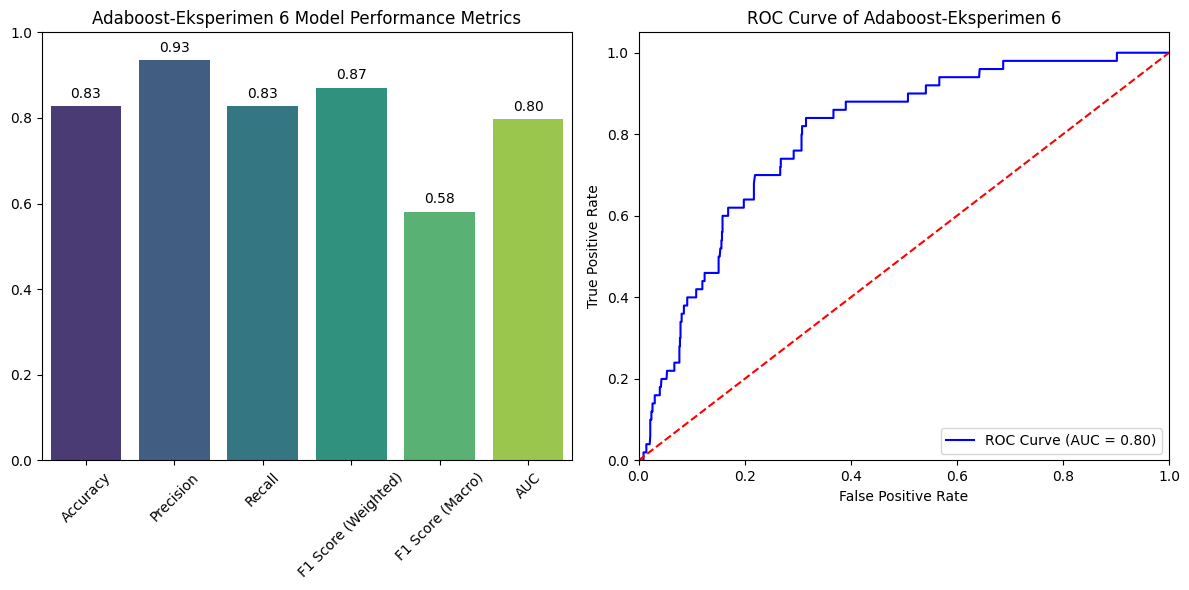

In [73]:
adaboost_eksperimen6 = random_search_adb.best_estimator_
adaboost_eksperimen6.fit(X_train_eksperimen5,y_train_smote)
y_pred_adaboost_eksperimen6 = adaboost_eksperimen6.predict(X_test_eksperimen5)
y_pred_proba_adaboost_eksperimen6=adaboost_eksperimen6.predict_proba(X_test_eksperimen5)[:,1]

visualize_model_performance(
    y_test, 
    y_pred_adaboost_eksperimen6,
    y_pred_proba_adaboost_eksperimen6,
    target_encoder, 
    'Confusion matrix of Adaboost-Eksperimen 6',
    'Adaboost-Eksperimen 6'
)

### Rangkuman Hasil Seluruh Eksperimen

In [84]:
report_f1_scores = pd.DataFrame({
    'Eksperimen-1': [54,51,48,49,57],
    'Eksperimen-2': [49,51,np.nan,np.nan,np.nan],
    'Eksperimen-3': [50,53,np.nan,np.nan,np.nan],
    'Eksperimen-4': [56,57,np.nan,np.nan,np.nan],
    'Eksperimen-5': [55,57,np.nan,np.nan,np.nan],
    'Eksperimen-6': [58,55,np.nan,np.nan,np.nan],
})
report_f1_scores.rename(index={
    0:'AdaBoost',
    1:'GradientBoosting',
    2:'XGBoosting',
    3:'Random Forest',
    4:'Support Vector Machine',
}, inplace=True)
report_auc_scores = pd.DataFrame({
    'Eksperimen-1': [84,85,78,75,71],
    'Eksperimen-2': [84,84,np.nan,np.nan,np.nan],
    'Eksperimen-3': [82,82,np.nan,np.nan,np.nan],
    'Eksperimen-4': [83,82,np.nan,np.nan,np.nan],
    'Eksperimen-5': [79,81,np.nan,np.nan,np.nan],
    'Eksperimen-6': [80,78,np.nan,np.nan,np.nan],
})
report_auc_scores.rename(index={
    0:'AdaBoost',
    1:'GradientBoosting',
    2:'XGBoosting',
    3:'Random Forest',
    4:'Support Vector Machine',
}, inplace=True)

In [85]:
report_auc_scores

,Eksperimen-1,Eksperimen-2,Eksperimen-3,Eksperimen-4,Eksperimen-5,Eksperimen-6
AdaBoost,84,84.0,82.0,83.0,79.0,80.0
GradientBoosting,85,84.0,82.0,82.0,81.0,78.0
XGBoosting,78,NaN,NaN,NaN,NaN,NaN
Random Forest,75,NaN,NaN,NaN,NaN,NaN
Support Vector Machine,71,NaN,NaN,NaN,NaN,NaN


In [86]:
report_f1_scores

,Eksperimen-1,Eksperimen-2,Eksperimen-3,Eksperimen-4,Eksperimen-5,Eksperimen-6
AdaBoost,54,49.0,50.0,56.0,55.0,58.0
GradientBoosting,51,51.0,53.0,57.0,57.0,55.0
XGBoosting,48,NaN,NaN,NaN,NaN,NaN
Random Forest,49,NaN,NaN,NaN,NaN,NaN
Support Vector Machine,57,NaN,NaN,NaN,NaN,NaN


# Evaluation
***
### Jika lebih dari 1 skema pelatihan kamu harus menyebutkan skeama atau model terbaik yang didapatkan.
Dari keenam eksperimen yang dilakukan, dua model terbaik yang diperoleh adalah adalah Adaboost dan GradientBoosting pada **Eksperimen ke-4** yaitu model yang dilakukan seleksi fitur dengan ANOVA, Chi-Square, dan Mutual Information disertai dengan sampling dengan SMOTE. Kedua model tersebut masing-masing memberikan nilai F1-score sebesar 56% dan 57% serta nilai AUC sebesar 83% dan 82%. Meskipun nilai AUC dari eksperimen ke-4 dari kedua model ini tidak lebih baik dari eksperimen ke2, namun nilai F1-score pada eksperimen ke-4 lebih berkompromi daripada eksperimen ke-2. Oleh karena itu, maka dipilih kedua model ini dari hasil eksperimen ke-4.
#### Dampak dari model yang dievaluasi terhadap Business Understanding
Model yang dievaluasi dapat membantu dalam mengidentifikasi pasien yang berisiko tinggi terkena stroke. Ini memungkinkan tenaga medis untuk memberikan intervensi lebih awal, yang berpotensi mengurangi angka kematian dan biaya pengobatan
#### Apakah sudah menjawab  **problem statement?**
Ya, hasil evaluasi model telah berhasil menjawab problem statement, yaitu memprediksi risiko stroke berdasarkan data demografis dan riwayat medis pasien.
#### Apakah berhasil  **mencapai goals**  yang diharapkan?
Model ini berhasil mencapai tujuan yang diharapkan dengan memberikan AUC yang cukup tinggi dan dapat digunakan untuk membantu dalam pengambilan keputusan medis terkait risiko stroke.
#### Apakah  **solusi statement**  yang kamu rencanakan  **berdampak?**
Solution statement yang telah dituliskan memiliki dampak positif, karena model ini berpotensi digunakan dalam praktik klinis untuk mendeteksi risiko stroke secara lebih cepat dan akurat, yang dapat menyelamatkan nyawa pasien.
